<a href="https://colab.research.google.com/github/kai01m/turing_ml/blob/main/MLModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load common libraries
import pandas as pd              # data manipulation
import numpy as np               # maths
import matplotlib.pyplot as plt  # plotting
from tqdm import tqdm            # loading bar

In [ ]:
# Load all the data

# Australia
df_AUS = pd.read_csv("Merged_data_AUS_FINAL.csv")

# Germany
df_GERM = pd.read_csv("Merged_data_GERM_FINAL.csv")

# Japan
df_JAP = pd.read_csv("Merged_data_JAP_FINAL.csv")

# UK
df_UK = pd.read_csv("Merged_data_UK_FINAL.csv")

# Australia
df_US = pd.read_csv("Merged_data_US_FINAL.csv")

In [ ]:
# Calculate change in CPI for each country and put in a new column
df_AUS['MoM inflation rates'] = df_AUS['CPI'].pct_change() * 100
df_GERM['MoM inflation rates'] = df_GERM['CPI'].pct_change() * 100
df_JAP['MoM inflation rates'] = df_JAP['CPI'].pct_change() * 100
df_UK['MoM inflation rates'] = df_UK['CPI'].pct_change() * 100
df_US['MoM inflation rates'] = df_US['CPI'].pct_change() * 100

In [ ]:
# Calculate yield curve for each country and put in a new column
df_AUS['Yield curve'] = df_AUS['10Y'] - df_AUS['2Y']
df_GERM['Yield curve'] = df_GERM['10Y'] - df_GERM['2Y']
df_JAP['Yield curve'] = df_JAP['10Y'] - df_JAP['2Y']
df_UK['Yield curve'] = df_UK['10Y'] - df_UK['2Y']
df_US['Yield curve'] = df_US['10Y'] - df_US['2Y']

In [ ]:
# Display one of the country's dataframe to see the result
df_AUS

Unnamed: 0        Date  realized_vol_30d  log_return(M)       GDP  \
0             0  1996-04-30          0.136554       0.042683  293301.0   
1             1  1996-05-31          0.116962      -0.005848  293301.0   
2             2  1996-06-30          0.136235      -0.017647  293301.0   
3             3  1996-07-31          0.256837      -0.041916  296088.0   
4             4  1996-08-31          0.186569       0.037335  296088.0   
..          ...         ...               ...            ...       ...   
334         334  2024-02-29          0.144187       0.012701  652734.0   
335         335  2024-03-31          0.145200       0.030936  652734.0   
336         336  2024-04-30          0.166362      -0.053528  654912.0   
337         337  2024-05-31          0.160584       0.056127  654912.0   
338         338  2024-06-30          0.141010       0.010202  654912.0   

            CPI     2Y       10Y  FX_Realized_Volatility(30)  \
0     66.366667  8.030  8.873684                    0.048389   
1     66.533333  8.180  8.832174                    0.054573   
2     66.700000  8.100  8.931579                    0.047146   
3     66.766667  7.250  8.629565                    0.063163   
4     66.833333  7.000  8.040000                    0.042134   
..          ...    ...       ...                         ...   
334  136.966667  3.736  4.141000                    0.071768   
335  137.400000  3.691  4.045000                    0.056306   
336  137.866667  4.100  4.268000                    0.084709   
337  138.333333  4.112  4.325000                    0.060393   
338  138.800000  4.192  4.242000                    0.079898   

     FX_Realized_Volatility(60)  FX_Realized_Volatility(90)  \
0                      0.044420                    0.045918   
1                      0.050627                    0.048034   
2                      0.051054                    0.049548   
3                      0.055305                    0.053758   
4                      0.053000                    0.052111   
..                          ...                         ...   
334                    0.067906                    0.072671   
335                    0.064198                    0.064550   
336                    0.071318                    0.071208   
337                    0.072256                    0.067813   
338                    0.070371                    0.074460   

     MoM inflation rates  Yield curve  
0                    NaN     0.843684  
1               0.251130     0.652174  
2               0.250501     0.831579  
3               0.099950     1.379565  
4               0.099850     1.040000  
..                   ...          ...  
334             0.317383     0.405000  
335             0.316379     0.354000  
336             0.339641     0.168000  
337             0.338491     0.213000  
338             0.337349     0.050000  

[339 rows x 13 columns]

In [ ]:
# Drop redundant columns to prepare dataset for ML models
df_AUS.drop(["10Y", "2Y"], axis=1, inplace=True)
df_GERM.drop(["10Y", "2Y"], axis=1, inplace=True)
df_JAP.drop(["10Y", "2Y"], axis=1, inplace=True)
df_UK.drop(["10Y", "2Y"], axis=1, inplace=True)
df_US.drop(["10Y", "2Y"], axis=1, inplace=True)

In [ ]:
# Drop the first row in every df since for MoM inflation rate the first row is not identified
df_AUS = df_AUS.iloc[1:].reset_index(drop=True)
df_GERM = df_GERM.iloc[1:].reset_index(drop=True)
df_JAP = df_JAP.iloc[1:].reset_index(drop=True)
df_UK = df_UK.iloc[1:].reset_index(drop=True)
df_US = df_US.iloc[1:].reset_index(drop=True)

# Display one of the country's dataframe to see the result
df_AUS

Unnamed: 0        Date  realized_vol_30d  log_return(M)       GDP  \
0             1  1996-05-31          0.116962      -0.005848  293301.0   
1             2  1996-06-30          0.136235      -0.017647  293301.0   
2             3  1996-07-31          0.256837      -0.041916  296088.0   
3             4  1996-08-31          0.186569       0.037335  296088.0   
4             5  1996-09-30          0.195619       0.000000  296088.0   
..          ...         ...               ...            ...       ...   
333         334  2024-02-29          0.144187       0.012701  652734.0   
334         335  2024-03-31          0.145200       0.030936  652734.0   
335         336  2024-04-30          0.166362      -0.053528  654912.0   
336         337  2024-05-31          0.160584       0.056127  654912.0   
337         338  2024-06-30          0.141010       0.010202  654912.0   

            CPI  FX_Realized_Volatility(30)  FX_Realized_Volatility(60)  \
0     66.533333                    0.054573                    0.050627   
1     66.700000                    0.047146                    0.051054   
2     66.766667                    0.063163                    0.055305   
3     66.833333                    0.042134                    0.053000   
4     66.900000                    0.042990                    0.042717   
..          ...                         ...                         ...   
333  136.966667                    0.071768                    0.067906   
334  137.400000                    0.056306                    0.064198   
335  137.866667                    0.084709                    0.071318   
336  138.333333                    0.060393                    0.072256   
337  138.800000                    0.079898                    0.070371   

     FX_Realized_Volatility(90)  MoM inflation rates  Yield curve  
0                      0.048034             0.251130     0.652174  
1                      0.049548             0.250501     0.831579  
2                      0.053758             0.099950     1.379565  
3                      0.052111             0.099850     1.040000  
4                      0.049662             0.099751     1.183333  
..                          ...                  ...          ...  
333                    0.072671             0.317383     0.405000  
334                    0.064550             0.316379     0.354000  
335                    0.071208             0.339641     0.168000  
336                    0.067813             0.338491     0.213000  
337                    0.074460             0.337349     0.050000  

[338 rows x 11 columns]

In [ ]:
# Drop redundant column to prepare dataset for ML models
df_AUS = df_AUS.drop(columns=['Unnamed: 0'])
df_GERM = df_GERM.drop(columns=['Unnamed: 0'])
df_JAP = df_JAP.drop(columns=['Unnamed: 0'])
df_UK = df_UK.drop(columns=['Unnamed: 0'])
df_US = df_US.drop(columns=['Unnamed: 0'])

# Display one of the country's dataframe to see the result
df_AUS

Date  realized_vol_30d  log_return(M)       GDP         CPI  \
0    1996-05-31          0.116962      -0.005848  293301.0   66.533333   
1    1996-06-30          0.136235      -0.017647  293301.0   66.700000   
2    1996-07-31          0.256837      -0.041916  296088.0   66.766667   
3    1996-08-31          0.186569       0.037335  296088.0   66.833333   
4    1996-09-30          0.195619       0.000000  296088.0   66.900000   
..          ...               ...            ...       ...         ...   
333  2024-02-29          0.144187       0.012701  652734.0  136.966667   
334  2024-03-31          0.145200       0.030936  652734.0  137.400000   
335  2024-04-30          0.166362      -0.053528  654912.0  137.866667   
336  2024-05-31          0.160584       0.056127  654912.0  138.333333   
337  2024-06-30          0.141010       0.010202  654912.0  138.800000   

     FX_Realized_Volatility(30)  FX_Realized_Volatility(60)  \
0                      0.054573                    0.050627   
1                      0.047146                    0.051054   
2                      0.063163                    0.055305   
3                      0.042134                    0.053000   
4                      0.042990                    0.042717   
..                          ...                         ...   
333                    0.071768                    0.067906   
334                    0.056306                    0.064198   
335                    0.084709                    0.071318   
336                    0.060393                    0.072256   
337                    0.079898                    0.070371   

     FX_Realized_Volatility(90)  MoM inflation rates  Yield curve  
0                      0.048034             0.251130     0.652174  
1                      0.049548             0.250501     0.831579  
2                      0.053758             0.099950     1.379565  
3                      0.052111             0.099850     1.040000  
4                      0.049662             0.099751     1.183333  
..                          ...                  ...          ...  
333                    0.072671             0.317383     0.405000  
334                    0.064550             0.316379     0.354000  
335                    0.071208             0.339641     0.168000  
336                    0.067813             0.338491     0.213000  
337                    0.074460             0.337349     0.050000  

[338 rows x 10 columns]

In [ ]:
# Convert Date column into datetime format
df_AUS['Date'] = pd.to_datetime(df_AUS['Date'])
df_GERM['Date'] = pd.to_datetime(df_GERM['Date'])
df_JAP['Date'] = pd.to_datetime(df_JAP['Date'])
df_UK['Date'] = pd.to_datetime(df_UK['Date'])
df_US['Date'] = pd.to_datetime(df_US['Date'])

# Display one of the country's dataframe to see the result
df_AUS

Date  realized_vol_30d  log_return(M)       GDP         CPI  \
0   1996-05-31          0.116962      -0.005848  293301.0   66.533333   
1   1996-06-30          0.136235      -0.017647  293301.0   66.700000   
2   1996-07-31          0.256837      -0.041916  296088.0   66.766667   
3   1996-08-31          0.186569       0.037335  296088.0   66.833333   
4   1996-09-30          0.195619       0.000000  296088.0   66.900000   
..         ...               ...            ...       ...         ...   
333 2024-02-29          0.144187       0.012701  652734.0  136.966667   
334 2024-03-31          0.145200       0.030936  652734.0  137.400000   
335 2024-04-30          0.166362      -0.053528  654912.0  137.866667   
336 2024-05-31          0.160584       0.056127  654912.0  138.333333   
337 2024-06-30          0.141010       0.010202  654912.0  138.800000   

     FX_Realized_Volatility(30)  FX_Realized_Volatility(60)  \
0                      0.054573                    0.050627   
1                      0.047146                    0.051054   
2                      0.063163                    0.055305   
3                      0.042134                    0.053000   
4                      0.042990                    0.042717   
..                          ...                         ...   
333                    0.071768                    0.067906   
334                    0.056306                    0.064198   
335                    0.084709                    0.071318   
336                    0.060393                    0.072256   
337                    0.079898                    0.070371   

     FX_Realized_Volatility(90)  MoM inflation rates  Yield curve  
0                      0.048034             0.251130     0.652174  
1                      0.049548             0.250501     0.831579  
2                      0.053758             0.099950     1.379565  
3                      0.052111             0.099850     1.040000  
4                      0.049662             0.099751     1.183333  
..                          ...                  ...          ...  
333                    0.072671             0.317383     0.405000  
334                    0.064550             0.316379     0.354000  
335                    0.071208             0.339641     0.168000  
336                    0.067813             0.338491     0.213000  
337                    0.074460             0.337349     0.050000  

[338 rows x 10 columns]

We split the sample such that training data is 80% of the data and test data is 20% of the data for each country. Since every country has the dataframe of the same size containing series with the same start and end date on monthly frequency, the cut-off date will be the same for every dataframe which is 269th observation.

In [ ]:
cutoff_date = '2018-01'

In [ ]:
# Train and test datasets for Australia
train_df_AUS = df_AUS[df_AUS['Date'] < cutoff_date].reset_index(drop=True)
test_df_AUS = df_AUS[df_AUS['Date'] >= cutoff_date].reset_index(drop=True)

In [ ]:
# Train and test datasets for Germany
train_df_GERM = df_GERM[df_GERM['Date'] < cutoff_date].reset_index(drop=True)
test_df_GERM = df_GERM[df_GERM['Date'] >= cutoff_date].reset_index(drop=True)

In [ ]:
# Train and test datasets for Japan
train_df_JAP = df_JAP[df_JAP['Date'] < cutoff_date].reset_index(drop=True)
test_df_JAP = df_JAP[df_JAP['Date'] >= cutoff_date].reset_index(drop=True)

In [ ]:
# Train and test datasets for UK
train_df_UK = df_UK[df_UK['Date'] < cutoff_date].reset_index(drop=True)
test_df_UK = df_UK[df_UK['Date'] >= cutoff_date].reset_index(drop=True)

In [ ]:
# Train and test datasets for US
train_df_US = df_US[df_US['Date'] < cutoff_date].reset_index(drop=True)
test_df_US = df_US[df_US['Date'] >= cutoff_date].reset_index(drop=True)

In [ ]:
# Prepare all the necessary inputs for the Random Forest

# Features (X): Australia
train_X_AUS = train_df_AUS.drop(columns=['Date', 'realized_vol_30d'])
test_X_AUS = test_df_AUS.drop(columns=['Date', 'realized_vol_30d'])

# Target (y): Australia
train_y_AUS = train_df_AUS['realized_vol_30d']
test_y_AUS = test_df_AUS['realized_vol_30d']

# Features (X): Germany
train_X_GERM = train_df_GERM.drop(columns=['Date', 'realized_vol_30d'])
test_X_GERM = test_df_GERM.drop(columns=['Date', 'realized_vol_30d'])

# Target (y): Germany
train_y_GERM = train_df_GERM['realized_vol_30d']
test_y_GERM = test_df_GERM['realized_vol_30d']

# Features (X): Japan
train_X_JAP = train_df_JAP.drop(columns=['Date', 'realized_vol_30d'])
test_X_JAP = test_df_JAP.drop(columns=['Date', 'realized_vol_30d'])

# Target (y): Japan
train_y_JAP = train_df_JAP['realized_vol_30d']
test_y_JAP = test_df_JAP['realized_vol_30d']

# Features (X): UK
train_X_UK = train_df_UK.drop(columns=['Date', 'realized_vol_30d'])
test_X_UK = test_df_UK.drop(columns=['Date', 'realized_vol_30d'])

# Target (y): UK
train_y_UK = train_df_UK['realized_vol_30d']
test_y_UK = test_df_UK['realized_vol_30d']

# Features (X): US
train_X_US = train_df_US.drop(columns=['Date', 'realized_vol_30d'])
test_X_US = test_df_US.drop(columns=['Date', 'realized_vol_30d'])

# Target (y): US
train_y_US = train_df_US['realized_vol_30d']
test_y_US = test_df_US['realized_vol_30d']

# **Random Forest**

In [ ]:
# Import all the necessary packages to run the Random Forest
from sklearn.ensemble import RandomForestRegressor as RFC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

Australia: Random Forest

In [ ]:
# Initialize arrays to store mean and std of train/test accuracies
train_acc_meanAUS, train_acc_stdAUS = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_meanAUS, test_acc_stdAUS = np.zeros((10, 8)), np.zeros((10, 8))

# Define ranges for number of trees and max depth
n_trees = np.arange(10, 101, 10)
depths = np.arange(1, 16, 2)

# Loop through tree and depth combinations
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []

        # Repeat training/testing 5 times for each setting
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_AUS, train_y_AUS)
            train_perfs.append(modelRFC.score(train_X_AUS, train_y_AUS))
            test_perfs.append(modelRFC.score(test_X_AUS, test_y_AUS))

        # Store mean and std of results
        train_acc_meanAUS[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_stdAUS[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_meanAUS[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_stdAUS[tree_idx][d_idx] = np.std(test_perfs)


100%|██████████| 10/10 [00:53<00:00,  5.39s/it]


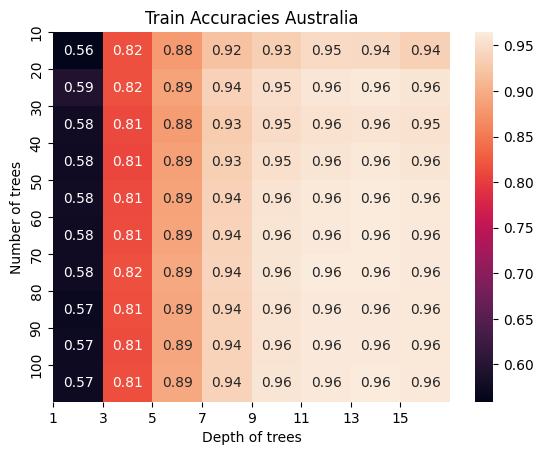

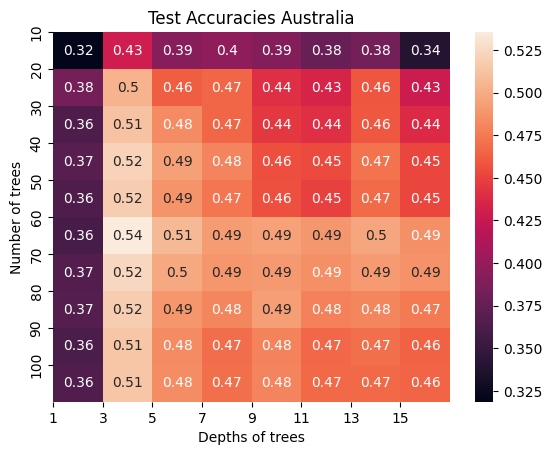

In [ ]:
# Plot two heatmaps : one for the training accuracy and one for the test accuracy
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_meanAUS, annot=True)
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.title("Train Accuracies Australia")
plt.ylabel("Number of trees")
plt.xlabel("Depth of trees")
plt.show()

# Figure 2
plt.figure()
sns.heatmap(test_acc_meanAUS, annot=True)
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.ylabel("Number of trees")
plt.xlabel("Depths of trees")
plt.title("Test Accuracies Australia")
plt.show()

In [ ]:
# Define finer ranges for number of trees and max depth
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Initialize arrays to store train/test mean and std accuracy
train_acc_meanAUS_new = np.zeros((len(n_trees), len(depths)))
train_acc_stdAUS_new = np.zeros((len(n_trees), len(depths)))
test_acc_meanAUS_new = np.zeros((len(n_trees), len(depths)))
test_acc_stdAUS_new = np.zeros((len(n_trees), len(depths)))

# Loop through each combination of tree count and depth
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs_new = []
        test_perfs_new = []

        # Train and evaluate model 5 times for each config
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_AUS, train_y_AUS)
            train_perfs_new.append(modelRFC.score(train_X_AUS, train_y_AUS))
            test_perfs_new.append(modelRFC.score(test_X_AUS, test_y_AUS))

        # Save average and std of train/test scores
        train_acc_meanAUS_new[tree_idx][d_idx] = np.mean(train_perfs_new)
        train_acc_stdAUS_new[tree_idx][d_idx] = np.std(train_perfs_new)
        test_acc_meanAUS_new[tree_idx][d_idx] = np.mean(test_perfs_new)
        test_acc_stdAUS_new[tree_idx][d_idx] = np.std(test_perfs_new)


100%|██████████| 11/11 [00:26<00:00,  2.45s/it]


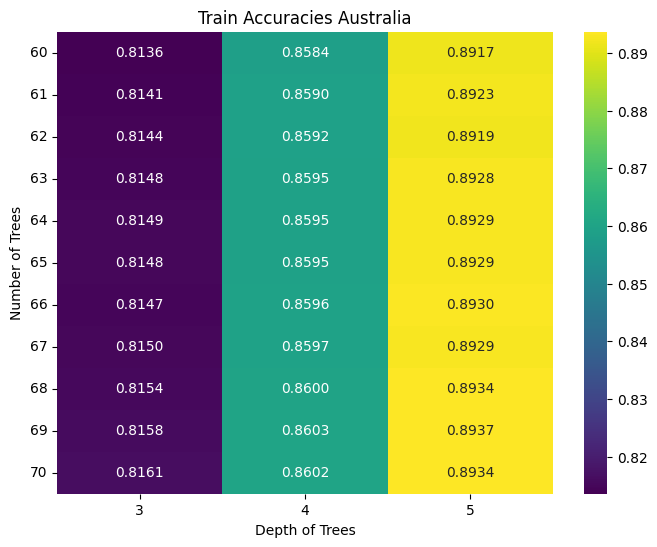

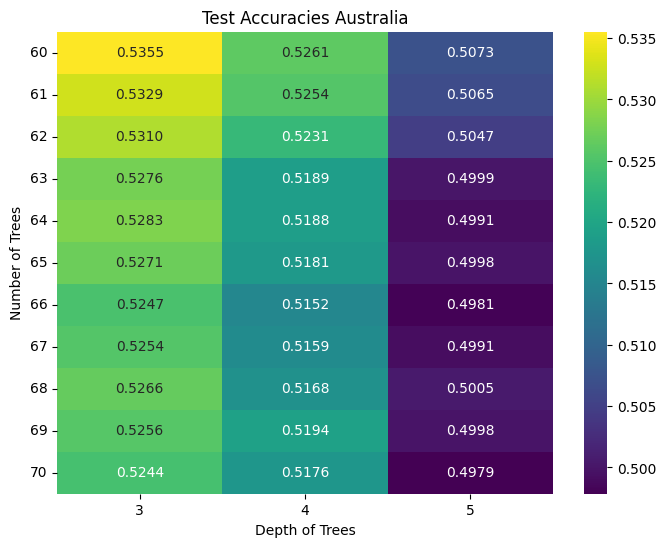

In [ ]:
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Plot train accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_meanAUS_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Train Accuracies Australia")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

# Plot test accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_meanAUS_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Test Accuracies Australia")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()


Based on the test-train accuracy trade-off, we can say that the best depth
of the tree is 3 and the best number of trees is 60. We will run this model separately again to compute all the accuracy measures for the best selected model.

In [ ]:
# Train Random Forest
modelRFC_best_AUS = RFC(n_estimators=60, max_depth = 3, random_state=42)
modelRFC_best_AUS = modelRFC_best_AUS.fit(train_X_AUS, train_y_AUS)

# Predict and evaluate
y_pred_AUS = modelRFC_best_AUS.predict(test_X_AUS)
mae_AUS = mean_absolute_error(test_y_AUS, y_pred_AUS)
mse_AUS = mean_squared_error(test_y_AUS, y_pred_AUS)
r2_AUS = r2_score(test_y_AUS, y_pred_AUS)
rmse_AUS = np.sqrt(mse_AUS)
mape_AUS = mean_absolute_percentage_error(test_y_AUS, y_pred_AUS)

train_perfs_AUS = modelRFC_best_AUS.score(train_X_AUS, train_y_AUS)
test_perfs_AUS = modelRFC_best_AUS.score(test_X_AUS, test_y_AUS)

print(f"Mean Absolute Error: {mae_AUS}")
print(f"Mean Squared Error: {mse_AUS}")
print(f"R2 Score: {r2_AUS}")
print(f'RMSE: {rmse_AUS}')
print(f"Mean Absolute Percentage Error: {mape_AUS}")
print(f"Training accuracy: {train_perfs_AUS }")
print(f"Test accuracy: {test_perfs_AUS}")

Mean Absolute Error: 0.044784621196829806
Mean Squared Error: 0.008625663121801824
R2 Score: 0.5355178948396053
RMSE: 0.09287444816418466
Mean Absolute Percentage Error: 0.20644301476413
Training accuracy: 0.8135578476114488
Test accuracy: 0.5355178948396053


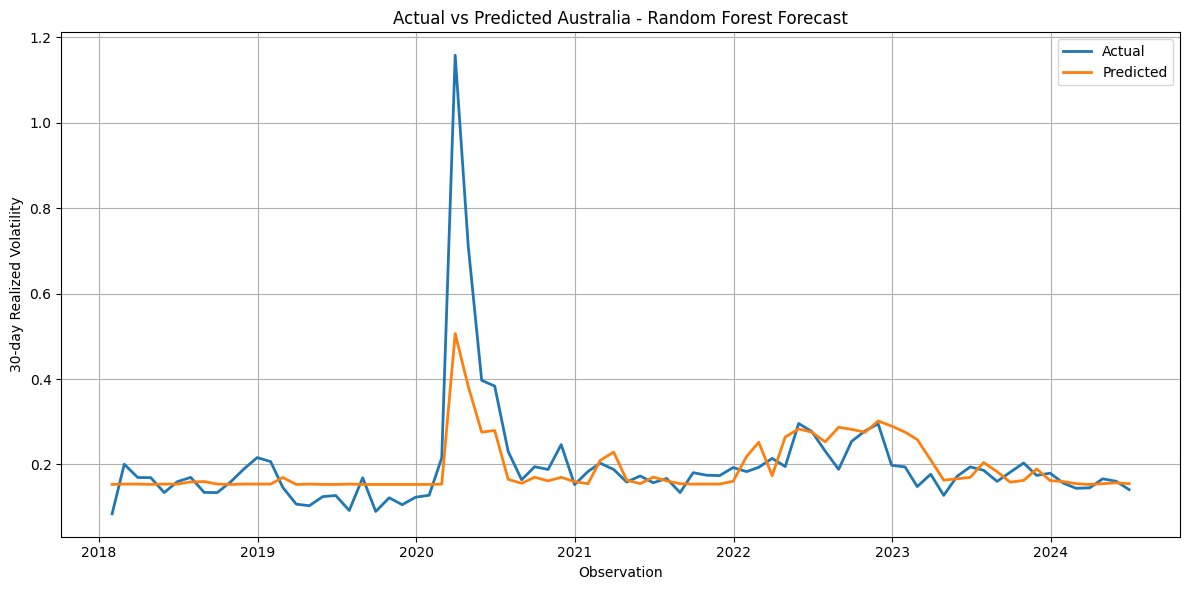

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_AUS['Date'], test_y_AUS.values, label='Actual', linewidth=2)
plt.plot(test_df_AUS['Date'], y_pred_AUS, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Australia - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-97-eba21c0cdd31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


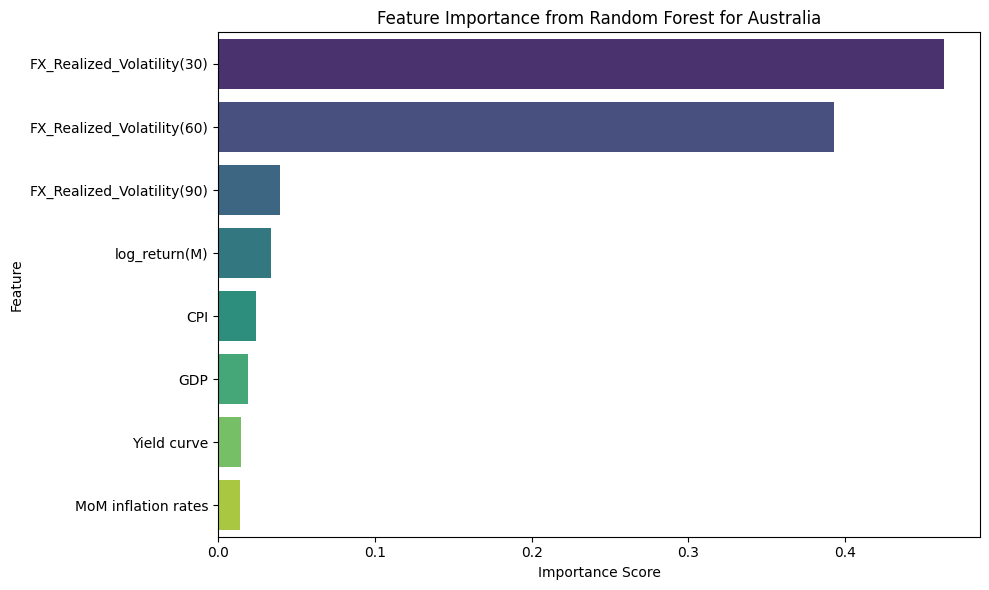

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_AUS.feature_importances_

# Get the column names from train_X
feature_names = train_X_AUS.columns

# dataframe fo importance of feutures
importance_df_AUS = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_AUS.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Australia')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
modelRFC_best_AUS = RFC(n_estimators=100000, max_depth = 3, random_state=42)
modelRFC_best_AUS = modelRFC_best_AUS.fit(train_X_AUS, train_y_AUS)

# Predict and evaluate
y_pred_AUS = modelRFC_best_AUS.predict(test_X_AUS)
mae_AUS = mean_absolute_error(test_y_AUS, y_pred_AUS)
mse_AUS = mean_squared_error(test_y_AUS, y_pred_AUS)
r2_AUS = r2_score(test_y_AUS, y_pred_AUS)
rmse_AUS = np.sqrt(mse_AUS)
mape_AUS = mean_absolute_percentage_error(test_y_AUS, y_pred_AUS)

train_perfs_AUS = modelRFC_best_AUS.score(train_X_AUS, train_y_AUS)
test_perfs_AUS = modelRFC_best_AUS.score(test_X_AUS, test_y_AUS)

print(f"Mean Absolute Error: {mae_AUS}")
print(f"Mean Squared Error: {mse_AUS}")
print(f"R2 Score: {r2_AUS}")
print(f'RMSE: {rmse_AUS}')
print(f"Mean Absolute Percentage Error: {mape_AUS}")
print(f"Training accuracy: {train_perfs_AUS }")
print(f"Test accuracy: {test_perfs_AUS}")

Mean Absolute Error: 0.045168071715784
Mean Squared Error: 0.009397997546282769
R2 Score: 0.4939285683953546
RMSE: 0.09694326973174966
Mean Absolute Percentage Error: 0.20796619782681516
Training accuracy: 0.819723603346973
Test accuracy: 0.4939285683953546


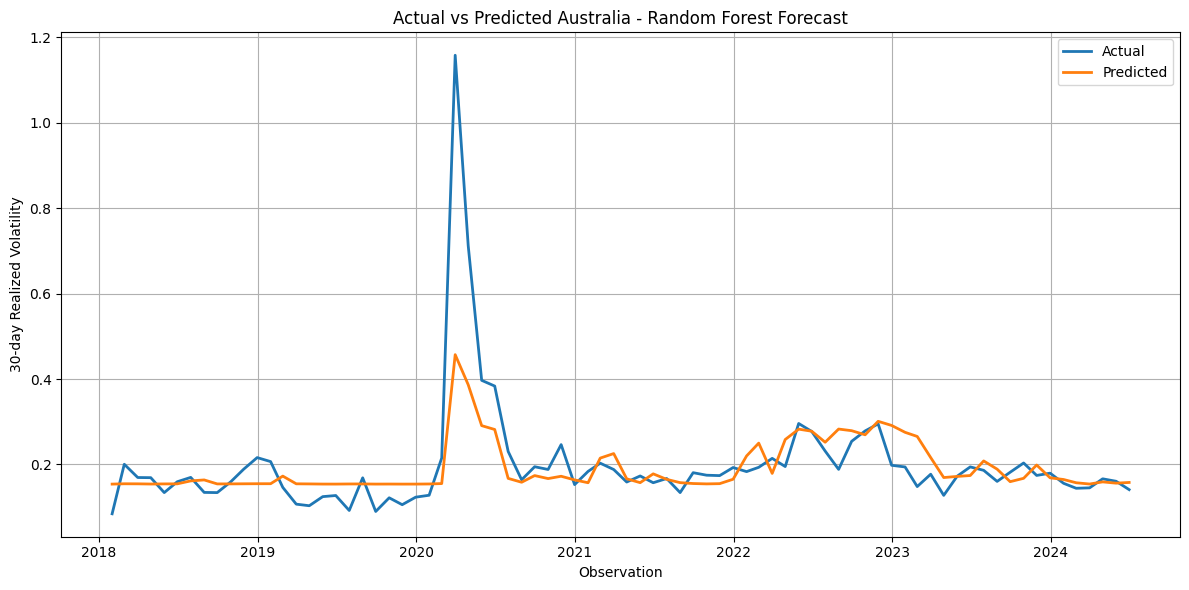

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_AUS['Date'], test_y_AUS.values, label='Actual', linewidth=2)
plt.plot(test_df_AUS['Date'], y_pred_AUS, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Australia - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

<ipython-input-23-eba21c0cdd31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


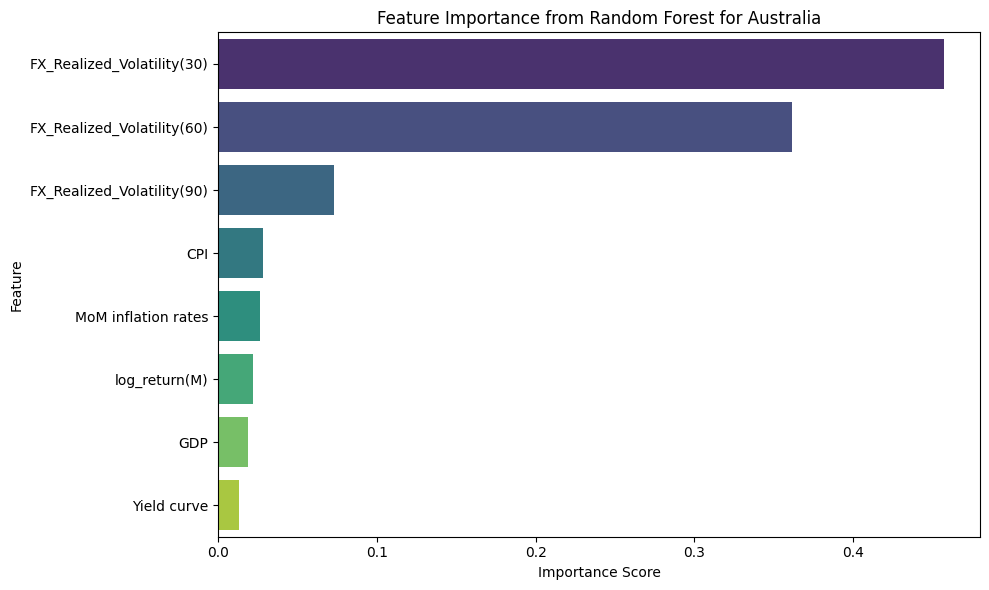

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_AUS.feature_importances_

# Get the column names from train_X
feature_names = train_X_AUS.columns

# dataframe fo importance of feutures
importance_df_AUS = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_AUS.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Australia')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Germany: Random Forest

In [ ]:
# Initialize arrays to store mean and std of train/test accuracies for German dataset
train_acc_meanGERM, train_acc_stdGERM = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_meanGERM, test_acc_stdGERM = np.zeros((10, 8)), np.zeros((10, 8))

# Define ranges for number of trees and max depth
n_trees = np.arange(10, 101, 10)
depths = np.arange(1, 16, 2)

# Loop through each tree and depth combination
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []

        # Repeat training/testing 5 times for each setting
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_GERM, train_y_GERM)
            train_perfs.append(modelRFC.score(train_X_GERM, train_y_GERM))
            test_perfs.append(modelRFC.score(test_X_GERM, test_y_GERM))

        # Store average and std of performance scores
        train_acc_meanGERM[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_stdGERM[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_meanGERM[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_stdGERM[tree_idx][d_idx] = np.std(test_perfs)


100%|██████████| 10/10 [01:29<00:00,  8.92s/it]


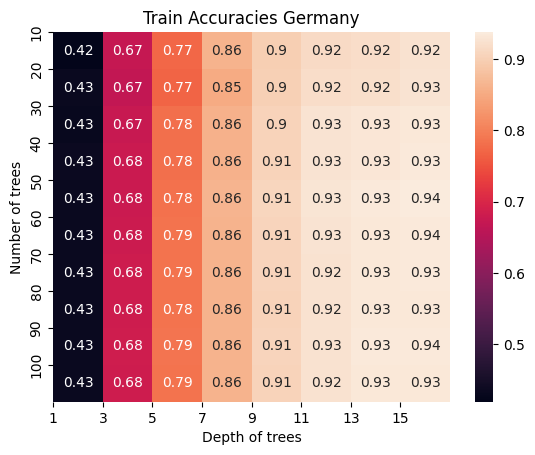

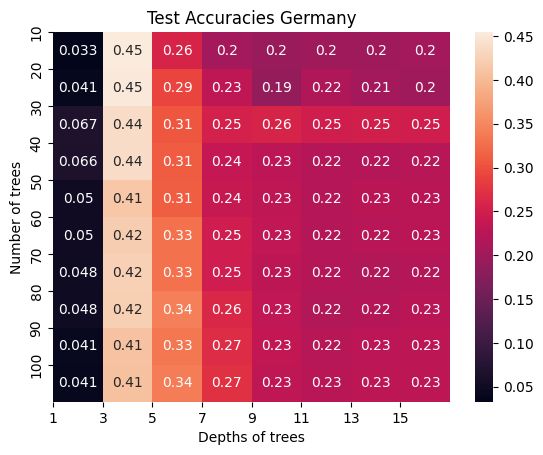

In [ ]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_meanGERM, annot=True)
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.title("Train Accuracies Germany")
plt.ylabel("Number of trees")
plt.xlabel("Depth of trees")
plt.show()

# Figure 2
plt.figure()
sns.heatmap(test_acc_meanGERM, annot=True)
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.ylabel("Number of trees")
plt.xlabel("Depths of trees")
plt.title("Test Accuracies Germany")
plt.show()

In [ ]:
# Define narrower ranges for trees and depth (fine-tuning)
n_trees = np.arange(20, 31, 1)
depths = np.arange(3, 6, 1)

# Initialize arrays to store mean and std of train/test accuracy for German dataset
train_acc_meanGERM_new = np.zeros((len(n_trees), len(depths)))
train_acc_stdGERM_new = np.zeros((len(n_trees), len(depths)))
test_acc_meanGERM_new = np.zeros((len(n_trees), len(depths)))
test_acc_stdGERM_new = np.zeros((len(n_trees), len(depths)))

# Loop over each combination of trees and depth
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs_new = []
        test_perfs_new = []

        # Run model 5 times per setting
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_GERM, train_y_GERM)
            train_perfs_new.append(modelRFC.score(train_X_GERM, train_y_GERM))
            test_perfs_new.append(modelRFC.score(test_X_GERM, test_y_GERM))

        # Store average and std of scores
        train_acc_meanGERM_new[tree_idx][d_idx] = np.mean(train_perfs_new)
        train_acc_stdGERM_new[tree_idx][d_idx] = np.std(train_perfs_new)
        test_acc_meanGERM_new[tree_idx][d_idx] = np.mean(test_perfs_new)
        test_acc_stdGERM_new[tree_idx][d_idx] = np.std(test_perfs_new)


100%|██████████| 11/11 [00:10<00:00,  1.05it/s]


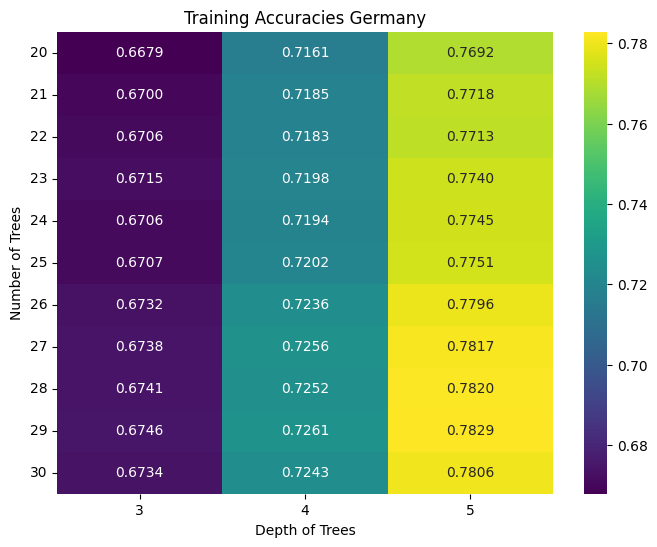

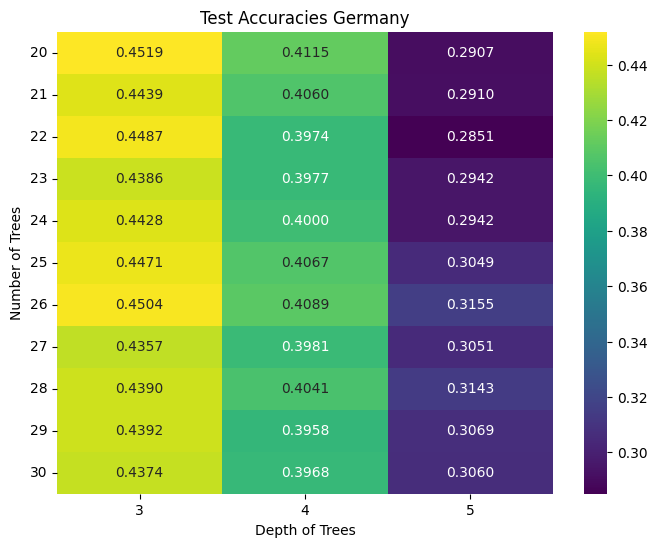

In [ ]:
n_trees = np.arange(20, 31, 1)
depths = np.arange(3, 6, 1)

# Plot train accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_meanGERM_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Training Accuracies Germany")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

# Plot test accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_meanGERM_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Test Accuracies Germany")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

Based on the test-train accuracy trade-off we can say that the best depth of the tree is 3 and the best number of trees is 20. We will run this model separately again to compute all the accuracy measures for the best selected model.

In [ ]:
# Train Random Forest
modelRFC_best_GERM = RFC(n_estimators=20, max_depth = 3, random_state=42)
modelRFC_best_GERM = modelRFC_best_GERM.fit(train_X_GERM, train_y_GERM)

# Predict and evaluate
y_pred_GERM = modelRFC_best_GERM.predict(test_X_GERM)
mae_GERM = mean_absolute_error(test_y_GERM, y_pred_GERM)
mse_GERM = mean_squared_error(test_y_GERM, y_pred_GERM)
r2_GERM = r2_score(test_y_GERM, y_pred_GERM)
rmse_GERM = np.sqrt(mse_GERM)
mape_GERM = mean_absolute_percentage_error(test_y_GERM, y_pred_GERM)

train_perfs_GERM = modelRFC_best_GERM.score(train_X_GERM, train_y_GERM)
test_perfs_GERM = modelRFC_best_GERM.score(test_X_GERM, test_y_GERM)

print(f"Mean Absolute Error: {mae_GERM}")
print(f"Mean Squared Error: {mse_GERM}")
print(f"R2 Score: {r2_GERM}")
print(f'RMSE: {rmse_GERM}')
print(f"Mean Absolute Percentage Error: {mape_GERM}")
print(f"Training accuracy: {train_perfs_GERM}")
print(f"Test accuracy: {test_perfs_GERM}")

Mean Absolute Error: 0.0470015338725483
Mean Squared Error: 0.005934576145999541
R2 Score: 0.4518599983614566
RMSE: 0.0770362002307976
Mean Absolute Percentage Error: 0.21490409848294767
Training accuracy: 0.6679009237309097
Test accuracy: 0.4518599983614566


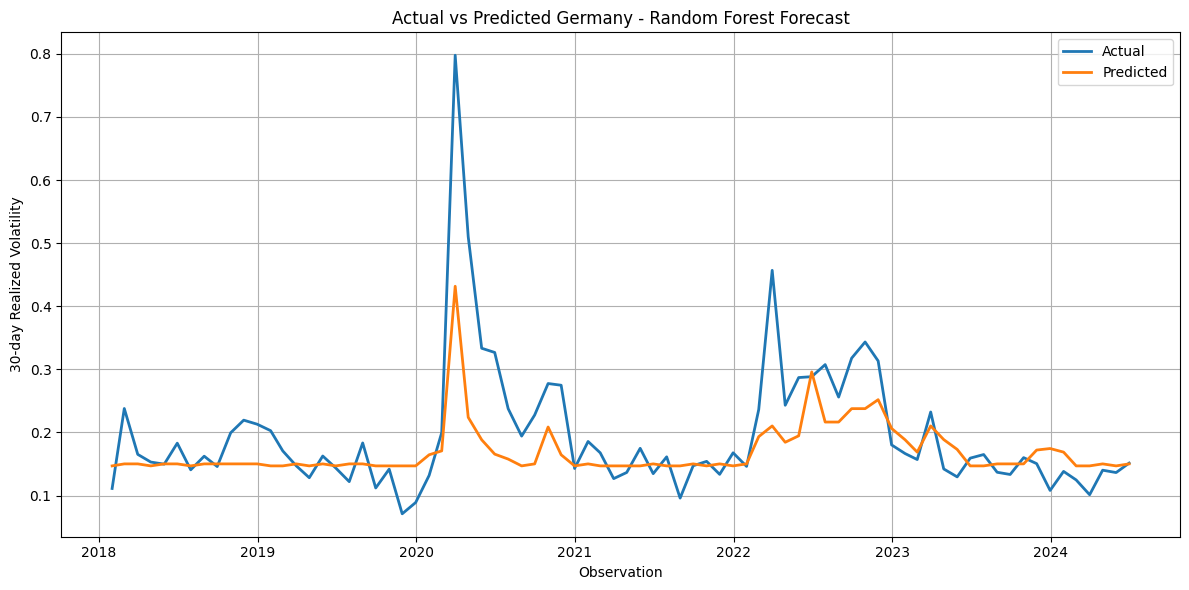

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_GERM['Date'], test_y_GERM.values, label='Actual', linewidth=2)
plt.plot(test_df_GERM['Date'], y_pred_GERM, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Germany - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-104-4c6d7da69b82>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


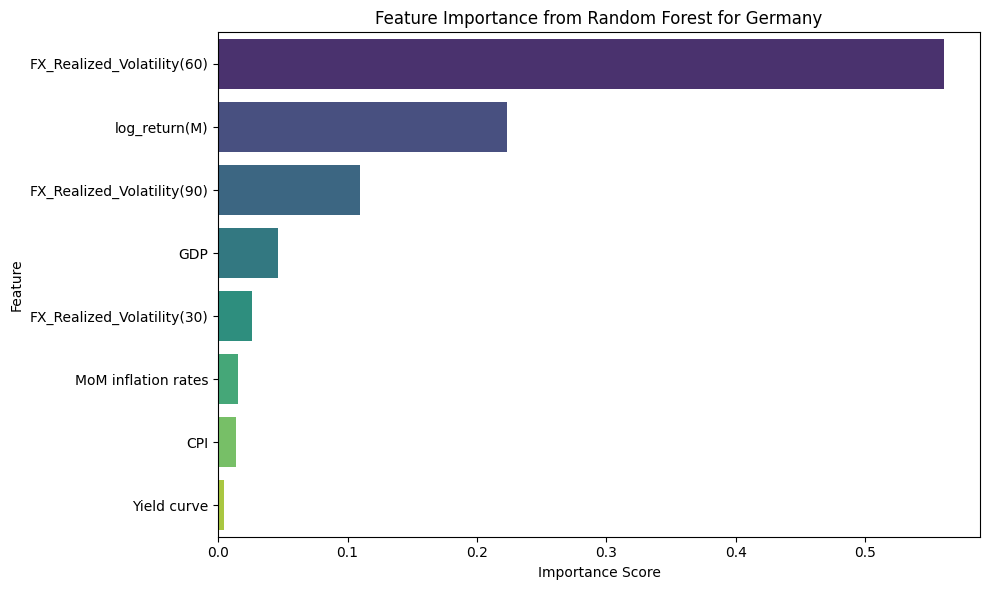

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_GERM.feature_importances_

# Get the column names from train_X
feature_names = train_X_GERM.columns

# dataframe fo importance of feutures
importance_df_GERM = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_GERM.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Germany')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
modelRFC_best_GERM = RFC(n_estimators=100000, max_depth = 3, random_state=42, n_jobs=-1)
modelRFC_best_GERM = modelRFC_best_GERM.fit(train_X_GERM, train_y_GERM)

# Predict and evaluate
y_pred_GERM = modelRFC_best_GERM.predict(test_X_GERM)
mae_GERM = mean_absolute_error(test_y_GERM, y_pred_GERM)
mse_GERM = mean_squared_error(test_y_GERM, y_pred_GERM)
r2_GERM = r2_score(test_y_GERM, y_pred_GERM)
rmse_GERM = np.sqrt(mse_GERM)
mape_GERM = mean_absolute_percentage_error(test_y_GERM, y_pred_GERM)

train_perfs_GERM = modelRFC_best_GERM.score(train_X_GERM, train_y_GERM)
test_perfs_GERM = modelRFC_best_GERM.score(test_X_GERM, test_y_GERM)

print(f"Mean Absolute Error: {mae_GERM}")
print(f"Mean Squared Error: {mse_GERM}")
print(f"R2 Score: {r2_GERM}")
print(f'RMSE: {rmse_GERM}')
print(f"Mean Absolute Percentage Error: {mape_GERM}")
print(f"Training accuracy: {train_perfs_GERM}")
print(f"Test accuracy: {test_perfs_GERM}")

Mean Absolute Error: 0.048964122011160814
Mean Squared Error: 0.006384855883579718
R2 Score: 0.4102704509324666
RMSE: 0.07990529321377726
Mean Absolute Percentage Error: 0.233808342648793
Training accuracy: 0.6840249225533499
Test accuracy: 0.4102704509324665


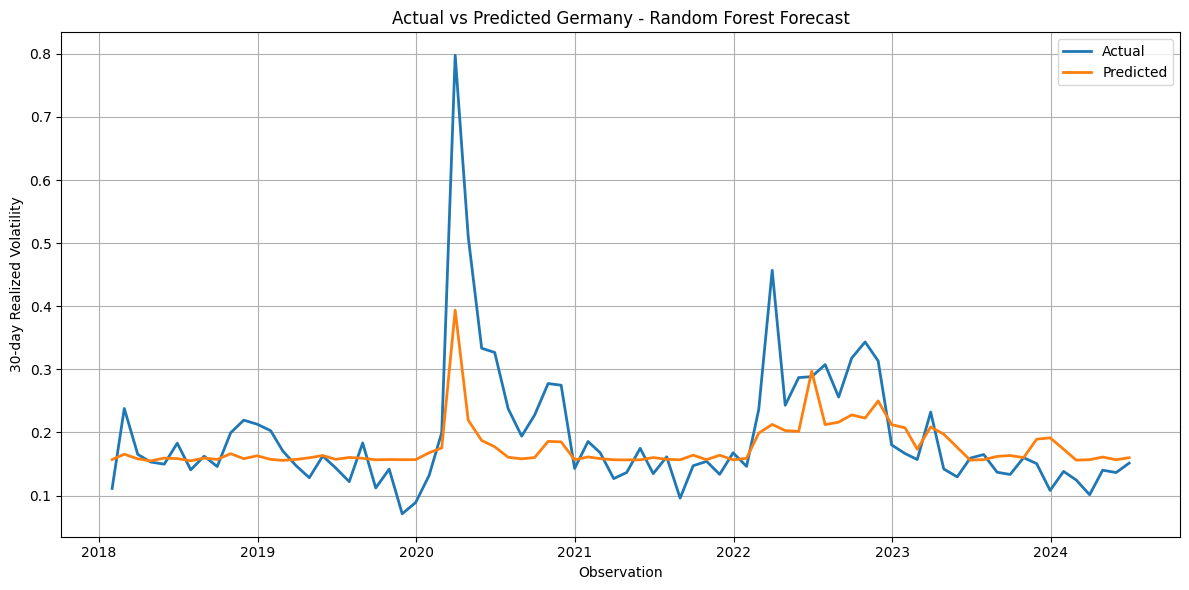

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_GERM['Date'], test_y_GERM.values, label='Actual', linewidth=2)
plt.plot(test_df_GERM['Date'], y_pred_GERM, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Germany - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-26-4c6d7da69b82>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


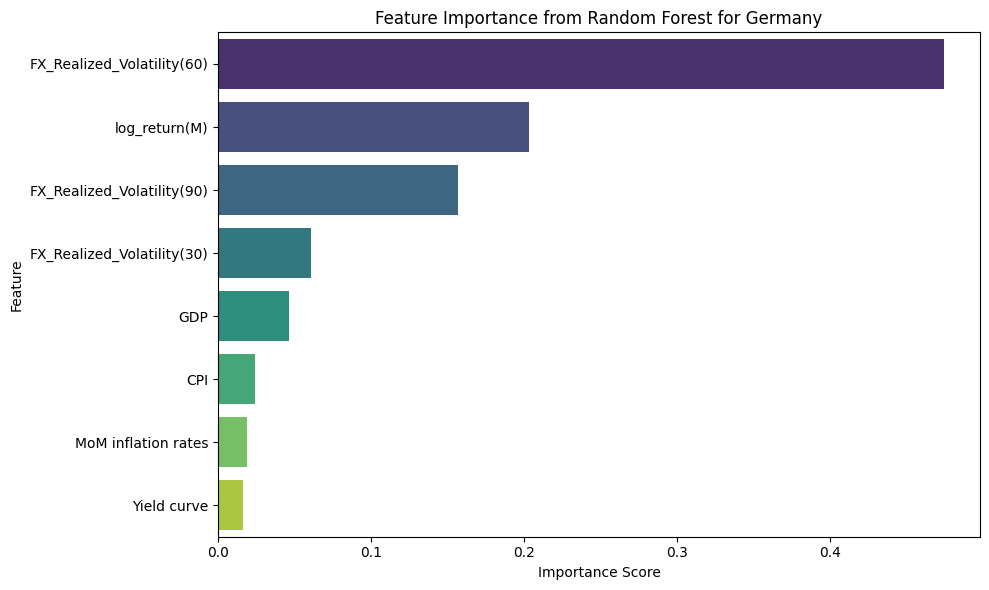

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_GERM.feature_importances_

# Get the column names from train_X
feature_names = train_X_GERM.columns

# dataframe fo importance of feutures
importance_df_GERM = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_GERM.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Germany')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Japan: Random Forest

In [ ]:
# Initialize arrays to store mean and std of train/test accuracy for Japan dataset
train_acc_meanJAP, train_acc_stdJAP = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_meanJAP, test_acc_stdJAP = np.zeros((10, 8)), np.zeros((10, 8))

# Define ranges for number of trees and max depth
n_trees = np.arange(10, 101, 10)
depths = np.arange(1, 16, 2)

# Loop over tree and depth combinations
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []

        # Train and evaluate model 5 times per setting
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d)
            modelRFC = modelRFC.fit(train_X_JAP, train_y_JAP)
            train_perfs.append(modelRFC.score(train_X_JAP, train_y_JAP))
            test_perfs.append(modelRFC.score(test_X_JAP, test_y_JAP))

        # Store mean and std of scores
        train_acc_meanJAP[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_stdJAP[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_meanJAP[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_stdJAP[tree_idx][d_idx] = np.std(test_perfs)


100%|██████████| 10/10 [01:10<00:00,  7.03s/it]


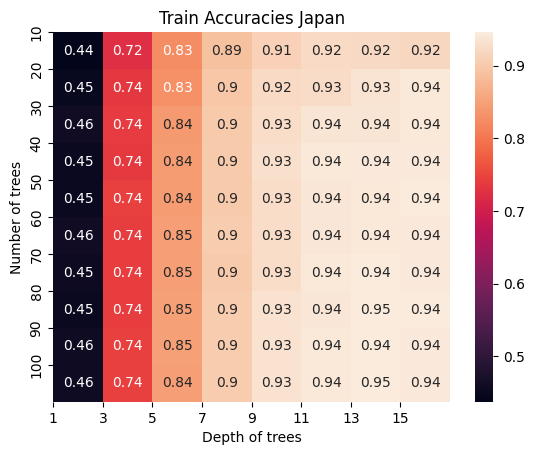

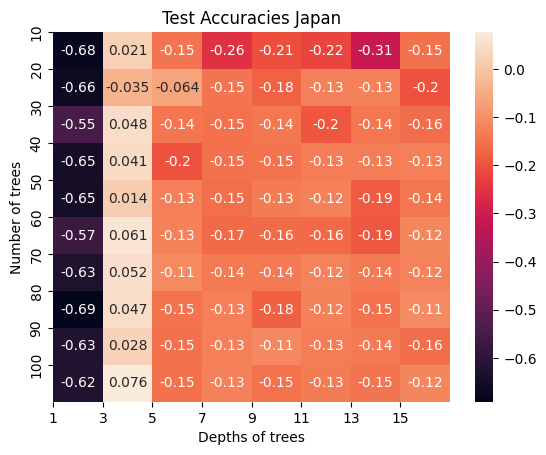

In [ ]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_meanJAP, annot=True)
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.title("Train Accuracies Japan")
plt.ylabel("Number of trees")
plt.xlabel("Depth of trees")
plt.show()

# Figure 2
plt.figure()
sns.heatmap(test_acc_meanJAP, annot=True)
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.ylabel("Number of trees")
plt.xlabel("Depths of trees")
plt.title("Test Accuracies Japan")
plt.show()

In [ ]:
# Fine-tune tree and depth ranges for Japan dataset
n_trees = np.arange(90, 101, 1)
depths = np.arange(3, 6, 1)

# Initialize arrays to store mean and std of train/test accuracy
train_acc_meanJAP_new = np.zeros((len(n_trees), len(depths)))
train_acc_stdJAP_new = np.zeros((len(n_trees), len(depths)))
test_acc_meanJAP_new = np.zeros((len(n_trees), len(depths)))
test_acc_stdJAP_new = np.zeros((len(n_trees), len(depths)))

# Loop through each tree and depth combination
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs_new = []
        test_perfs_new = []

        # Run model 5 times for current config
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_JAP, train_y_JAP)
            train_perfs_new.append(modelRFC.score(train_X_JAP, train_y_JAP))
            test_perfs_new.append(modelRFC.score(test_X_JAP, test_y_JAP))

        # Store average and std accuracy
        train_acc_meanJAP_new[tree_idx][d_idx] = np.mean(train_perfs_new)
        train_acc_stdJAP_new[tree_idx][d_idx] = np.std(train_perfs_new)
        test_acc_meanJAP_new[tree_idx][d_idx] = np.mean(test_perfs_new)
        test_acc_stdJAP_new[tree_idx][d_idx] = np.std(test_perfs_new)


100%|██████████| 11/11 [00:36<00:00,  3.28s/it]


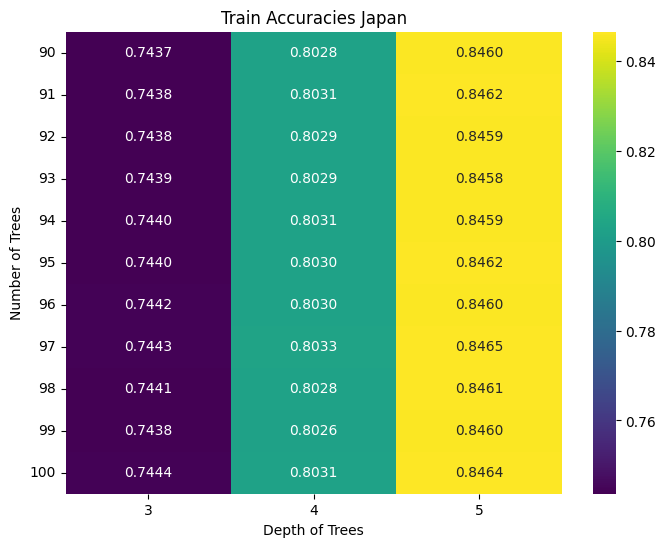

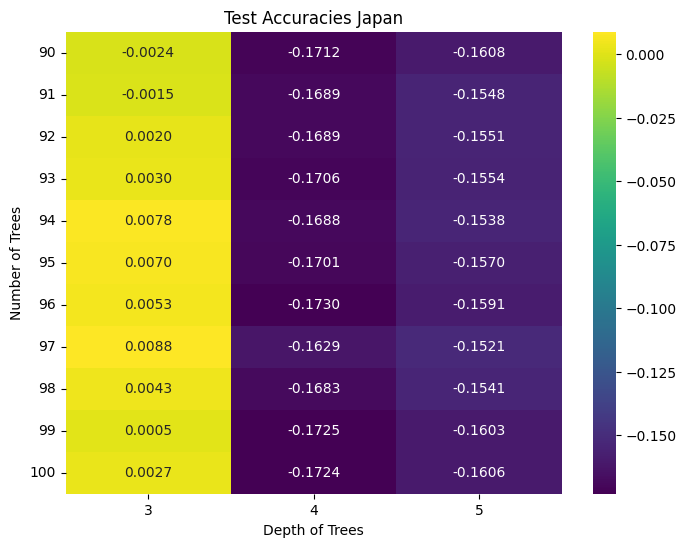

In [ ]:
n_trees = np.arange(90, 101, 1)
depths = np.arange(3, 6, 1)

# Plot training accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_meanJAP_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Train Accuracies Japan")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

# Plot test accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_meanJAP_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Test Accuracies Japan")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

Based on the test accuracy we can say that the best depth of the tree is 3 and the best number of trees is 94. We will run this model separately again to compute all the accuracy measures for the best selected model.

In [ ]:
# Train Random Forest
modelRFC_best_JAP = RFC(n_estimators=94, max_depth = 3, random_state=42)
modelRFC_best_JAP = modelRFC_best_JAP.fit(train_X_JAP, train_y_JAP)

# Predict and evaluate
y_pred_JAP = modelRFC_best_JAP.predict(test_X_JAP)
mae_JAP = mean_absolute_error(test_y_JAP, y_pred_JAP)
mse_JAP = mean_squared_error(test_y_JAP, y_pred_JAP)
r2_JAP = r2_score(test_y_JAP, y_pred_JAP)
rmse_JAP = np.sqrt(mse_JAP)
mape_JAP = mean_absolute_percentage_error(test_y_JAP, y_pred_JAP)

train_perfs_JAP = modelRFC_best_JAP.score(train_X_JAP, train_y_JAP)
test_perfs_JAP = modelRFC_best_JAP.score(test_X_JAP, test_y_JAP)

print(f"Mean Absolute Error: {mae_JAP}")
print(f"Mean Squared Error: {mse_JAP}")
print(f"R2 Score: {r2_JAP}")
print(f'RMSE: {rmse_JAP}')
print(f"Mean Absolute Percentage Error: {mape_JAP}")
print(f"Training accuracy: {train_perfs_JAP}")
print(f"Test accuracy: {test_perfs_JAP}")

Mean Absolute Error: 0.041823134280543024
Mean Squared Error: 0.004109394428652996
R2 Score: 0.007753798785227972
RMSE: 0.06410455856374798
Mean Absolute Percentage Error: 0.2714841701780175
Training accuracy: 0.7439955162717211
Test accuracy: 0.007753798785227972


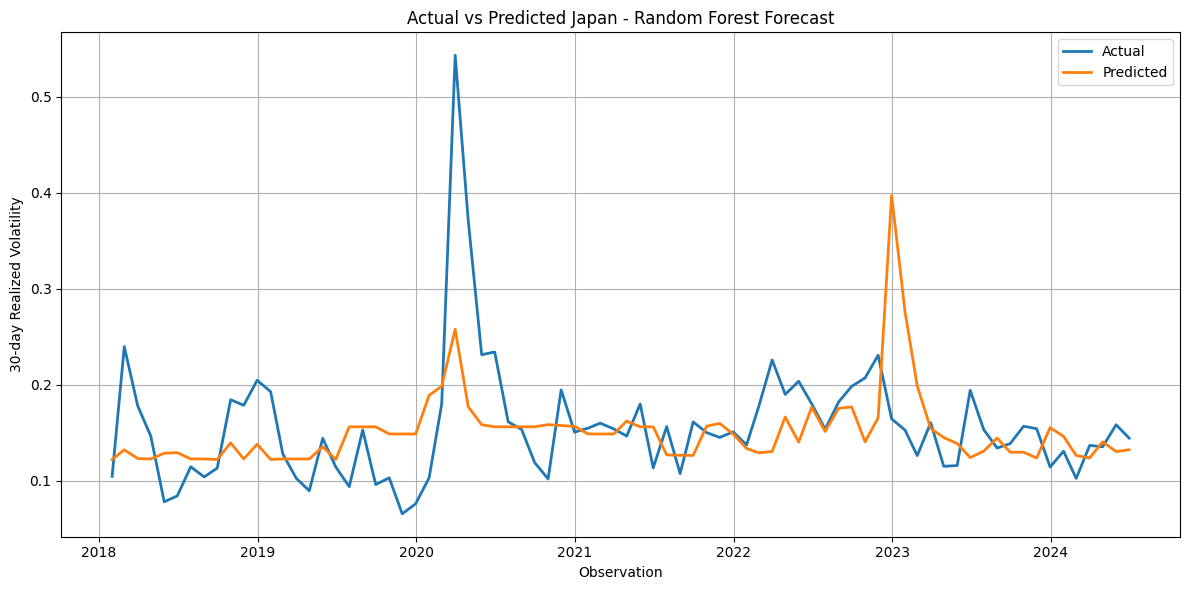

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_JAP['Date'], test_y_JAP.values, label='Actual', linewidth=2)
plt.plot(test_df_JAP['Date'], y_pred_JAP, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Japan - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-111-ebf8b6a9807a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


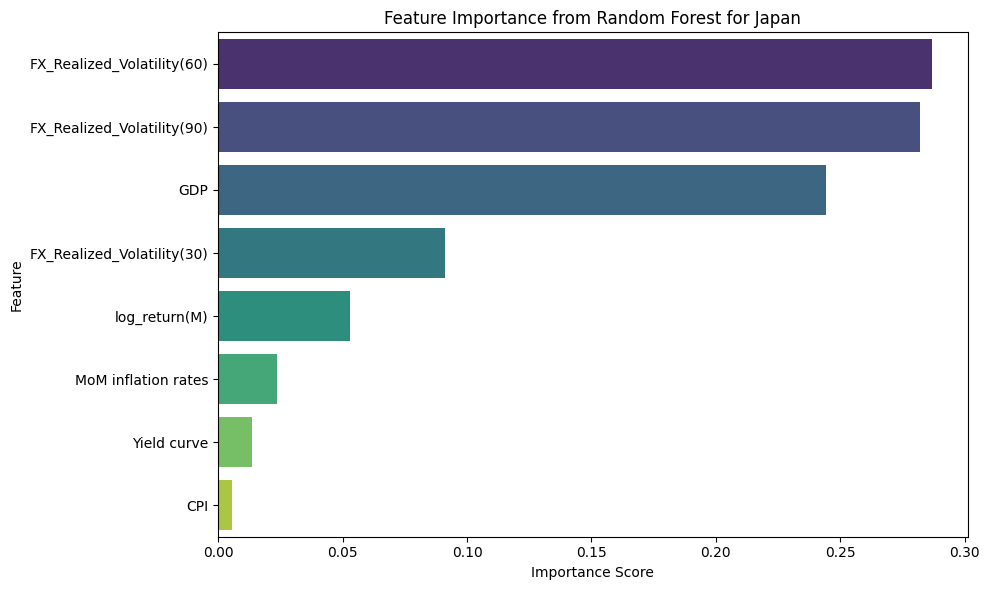

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_JAP.feature_importances_

# Get the column names from train_X
feature_names = train_X_JAP.columns

# dataframe fo importance of feutures
importance_df_JAP = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_JAP.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Japan')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
modelRFC_best_JAP = RFC(n_estimators=100000, max_depth = 3, random_state=42, n_jobs=-1)
modelRFC_best_JAP = modelRFC_best_JAP.fit(train_X_JAP, train_y_JAP)

# Predict and evaluate
y_pred_JAP = modelRFC_best_JAP.predict(test_X_JAP)
mae_JAP = mean_absolute_error(test_y_JAP, y_pred_JAP)
mse_JAP = mean_squared_error(test_y_JAP, y_pred_JAP)
r2_JAP = r2_score(test_y_JAP, y_pred_JAP)
rmse_JAP = np.sqrt(mse_JAP)
mape_JAP = mean_absolute_percentage_error(test_y_JAP, y_pred_JAP)

train_perfs_JAP = modelRFC_best_JAP.score(train_X_JAP, train_y_JAP)
test_perfs_JAP = modelRFC_best_JAP.score(test_X_JAP, test_y_JAP)

print(f"Mean Absolute Error: {mae_JAP}")
print(f"Mean Squared Error: {mse_JAP}")
print(f"R2 Score: {r2_JAP}")
print(f'RMSE: {rmse_JAP}')
print(f"Mean Absolute Percentage Error: {mape_JAP}")
print(f"Training accuracy: {train_perfs_JAP}")
print(f"Test accuracy: {test_perfs_JAP}")

Mean Absolute Error: 0.04163993558313265
Mean Squared Error: 0.00391366021167965
R2 Score: 0.05501539331248084
RMSE: 0.06255925360551906
Mean Absolute Percentage Error: 0.2663914331962913
Training accuracy: 0.7449808353410325
Test accuracy: 0.05501539331248084


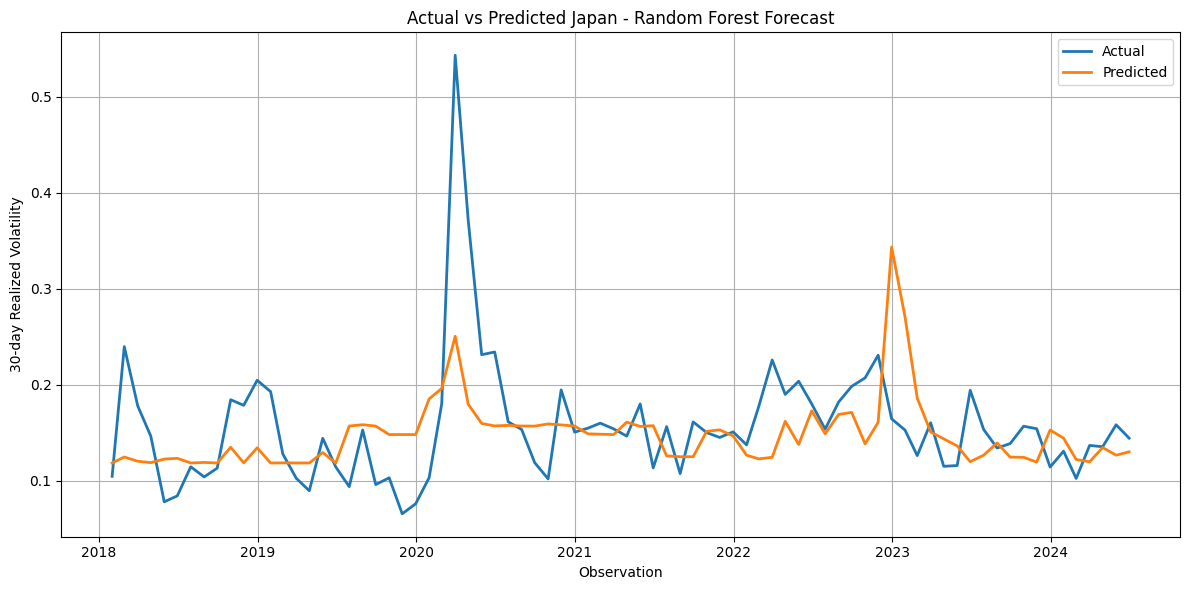

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_JAP['Date'], test_y_JAP.values, label='Actual', linewidth=2)
plt.plot(test_df_JAP['Date'], y_pred_JAP, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted Japan - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-29-ebf8b6a9807a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


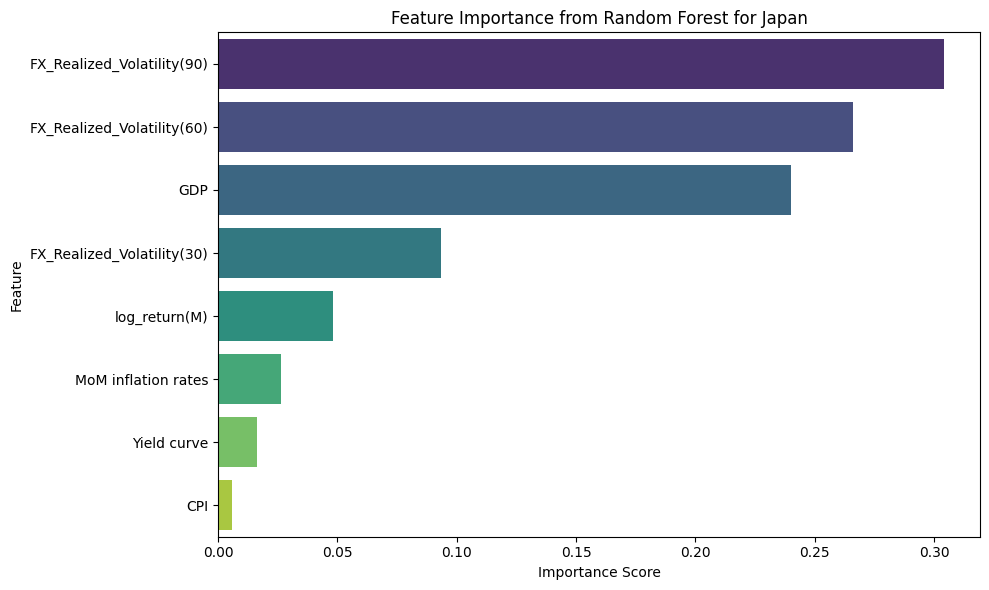

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_JAP.feature_importances_

# Get the column names from train_X
feature_names = train_X_JAP.columns

# dataframe fo importance of feutures
importance_df_JAP = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_JAP.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for Japan')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

UK: Random Forest

In [ ]:
# Initialize arrays to store mean and std of train/test accuracy for UK dataset
train_acc_meanUK, train_acc_stdUK = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_meanUK, test_acc_stdUK = np.zeros((10, 8)), np.zeros((10, 8))

# Define ranges for number of trees and max depth
n_trees = np.arange(10, 101, 10)
depths = np.arange(1, 16, 2)

# Loop over combinations of trees and depth
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []

        # Train and evaluate model 5 times
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d)
            modelRFC = modelRFC.fit(train_X_UK, train_y_UK)
            train_perfs.append(modelRFC.score(train_X_UK, train_y_UK))
            test_perfs.append(modelRFC.score(test_X_UK, test_y_UK))

        # Save mean and std of scores
        train_acc_meanUK[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_stdUK[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_meanUK[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_stdUK[tree_idx][d_idx] = np.std(test_perfs)


100%|██████████| 10/10 [01:07<00:00,  6.80s/it]


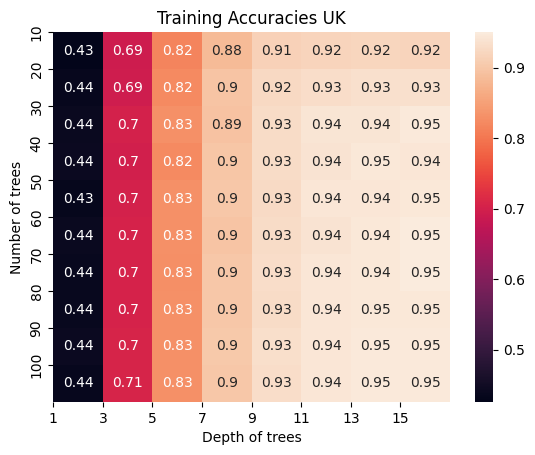

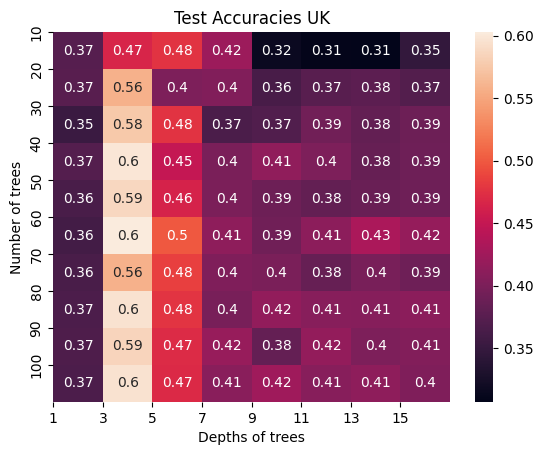

In [ ]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_meanUK, annot=True)
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.title("Train Accuracies UK")
plt.ylabel("Number of trees")
plt.xlabel("Depth of trees")
plt.show()

# Figure 2
plt.figure()
sns.heatmap(test_acc_meanUK, annot=True)
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.ylabel("Number of trees")
plt.xlabel("Depths of trees")
plt.title("Test Accuracies UK")
plt.show()

In [ ]:
# Fine-tune tree and depth ranges for UK dataset
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Initialize arrays to store mean and std of train/test accuracy
train_acc_meanUK_new = np.zeros((len(n_trees), len(depths)))
train_acc_stdUK_new = np.zeros((len(n_trees), len(depths)))
test_acc_meanUK_new = np.zeros((len(n_trees), len(depths)))
test_acc_stdUK_new = np.zeros((len(n_trees), len(depths)))

# Loop over combinations of trees and depths
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs_new = []
        test_perfs_new = []

        # Train and evaluate model 5 times for current config
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_UK, train_y_UK)
            train_perfs_new.append(modelRFC.score(train_X_UK, train_y_UK))
            test_perfs_new.append(modelRFC.score(test_X_UK, test_y_UK))

        # Store average and std of performance scores
        train_acc_meanUK_new[tree_idx][d_idx] = np.mean(train_perfs_new)
        train_acc_stdUK_new[tree_idx][d_idx] = np.std(train_perfs_new)
        test_acc_meanUK_new[tree_idx][d_idx] = np.mean(test_perfs_new)
        test_acc_stdUK_new[tree_idx][d_idx] = np.std(test_perfs_new)


100%|██████████| 11/11 [00:33<00:00,  3.02s/it]


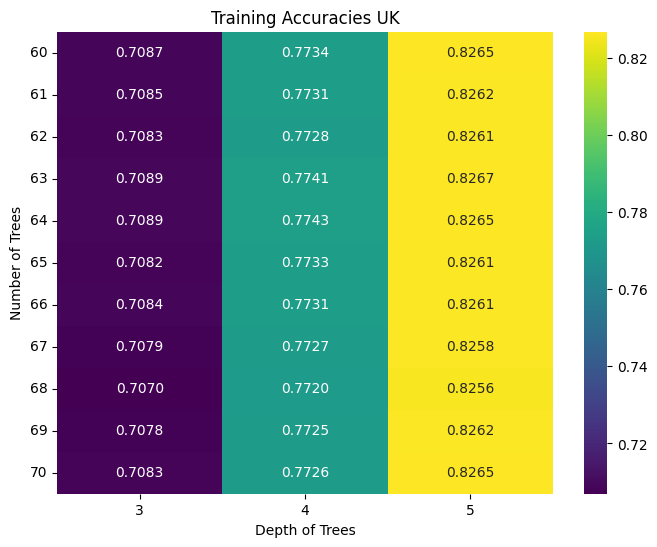

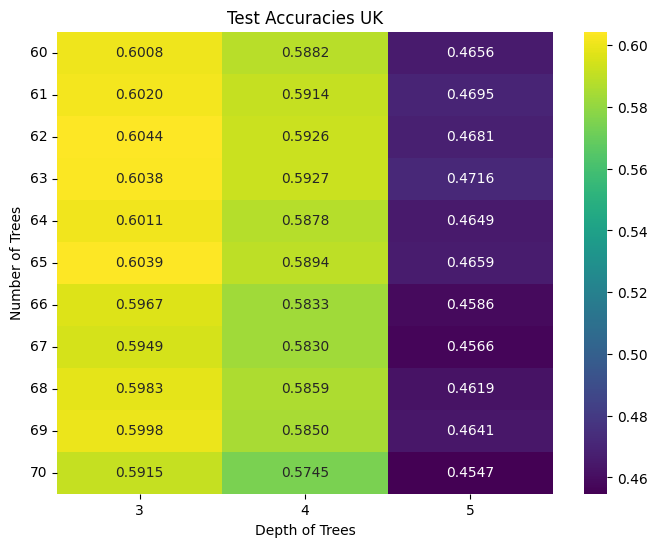

In [ ]:
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Plot training accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_meanUK_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Training Accuracies UK")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

# Plot test accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_meanUK_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Test Accuracies UK")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

Based on the test accuracy we can say that the best depth of the tree is 3 and the best number of trees is 62. We will run this model separately again to compute all the accuracy measures for the best selected model.

In [ ]:
# Train Random Forest
modelRFC_best_UK = RFC(n_estimators=62, max_depth = 3, random_state=42)
modelRFC_best_UK = modelRFC_best_UK.fit(train_X_UK, train_y_UK)

# Predict and evaluate
y_pred_UK = modelRFC_best_UK.predict(test_X_UK)
mae_UK = mean_absolute_error(test_y_UK, y_pred_UK)
mse_UK = mean_squared_error(test_y_UK, y_pred_UK)
r2_UK = r2_score(test_y_UK, y_pred_UK)
rmse_UK = np.sqrt(mse_UK)
mape_UK = mean_absolute_percentage_error(test_y_UK, y_pred_UK)

train_perfs_UK = modelRFC_best_UK.score(train_X_UK, train_y_UK)
test_perfs_UK = modelRFC_best_UK.score(test_X_UK, test_y_UK)

print(f"Mean Absolute Error: {mae_UK}")
print(f"Mean Squared Error: {mse_UK}")
print(f"R2 Score: {r2_UK}")
print(f'RMSE: {rmse_UK}')
print(f"Mean Absolute Percentage Error: {mape_UK}")
print(f"Training accuracy: {train_perfs_UK}")
print(f"Test accuracy: {test_perfs_UK}")

Mean Absolute Error: 0.04314827475003233
Mean Squared Error: 0.004125839799939596
R2 Score: 0.6043874084457217
RMSE: 0.06423270039426644
Mean Absolute Percentage Error: 0.24979613567920458
Training accuracy: 0.7082892138268906
Test accuracy: 0.6043874084457217


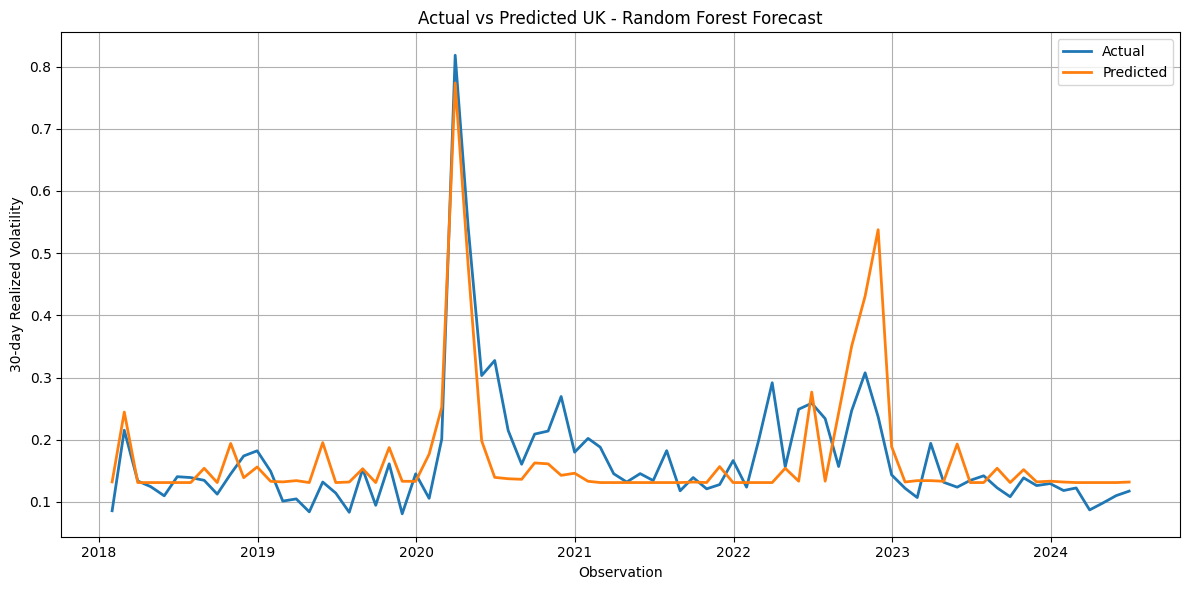

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_UK['Date'], test_y_UK.values, label='Actual', linewidth=2)
plt.plot(test_df_UK['Date'], y_pred_UK, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted UK - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-81-50a705d3d208>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


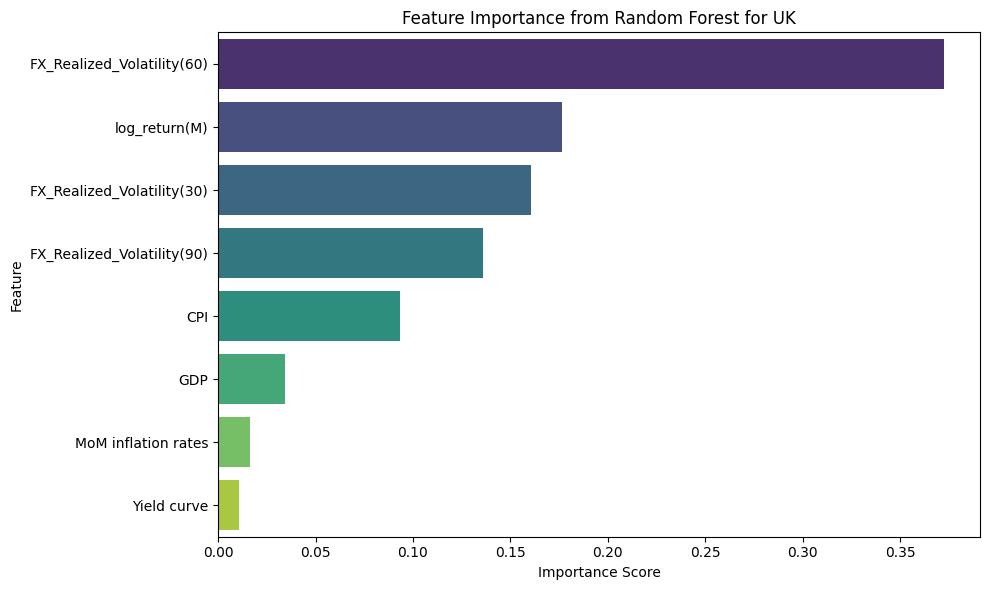

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_UK.feature_importances_

# Get the column names from train_X
feature_names = train_X_UK.columns

# dataframe fo importance of feutures
importance_df_UK = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_UK.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for UK')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
modelRFC_best_UK = RFC(n_estimators=100000, max_depth = 3, random_state=42, n_jobs=-1)
modelRFC_best_UK = modelRFC_best_UK.fit(train_X_UK, train_y_UK)

# Predict and evaluate
y_pred_UK = modelRFC_best_UK.predict(test_X_UK)
mae_UK = mean_absolute_error(test_y_UK, y_pred_UK)
mse_UK = mean_squared_error(test_y_UK, y_pred_UK)
r2_UK = r2_score(test_y_UK, y_pred_UK)
rmse_UK = np.sqrt(mse_UK)
mape_UK = mean_absolute_percentage_error(test_y_UK, y_pred_UK)

train_perfs_UK = modelRFC_best_UK.score(train_X_UK, train_y_UK)
test_perfs_UK = modelRFC_best_UK.score(test_X_UK, test_y_UK)

print(f"Mean Absolute Error: {mae_UK}")
print(f"Mean Squared Error: {mse_UK}")
print(f"R2 Score: {r2_UK}")
print(f'RMSE: {rmse_UK}')
print(f"Mean Absolute Percentage Error: {mape_UK}")
print(f"Training accuracy: {train_perfs_UK}")
print(f"Test accuracy: {test_perfs_UK}")

Mean Absolute Error: 0.04256451178590591
Mean Squared Error: 0.004100936530980355
R2 Score: 0.6067752972753565
RMSE: 0.06403855503507519
Mean Absolute Percentage Error: 0.2375795452346378
Training accuracy: 0.7072606240478307
Test accuracy: 0.6067752972753565


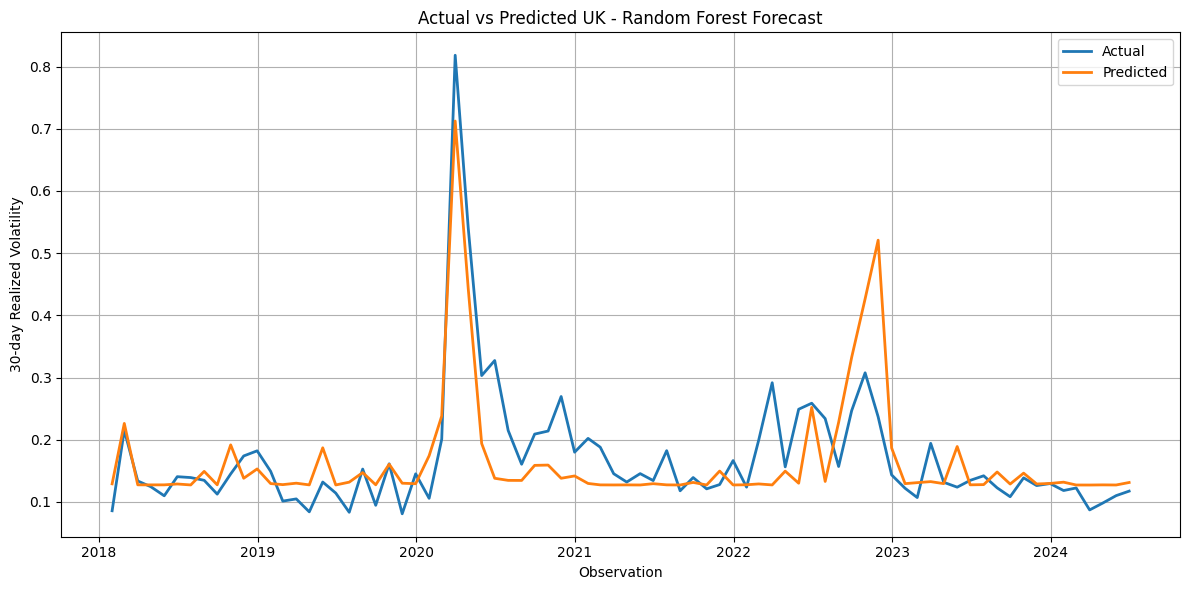

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_UK['Date'], test_y_UK.values, label='Actual', linewidth=2)
plt.plot(test_df_UK['Date'], y_pred_UK, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted UK - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-33-50a705d3d208>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


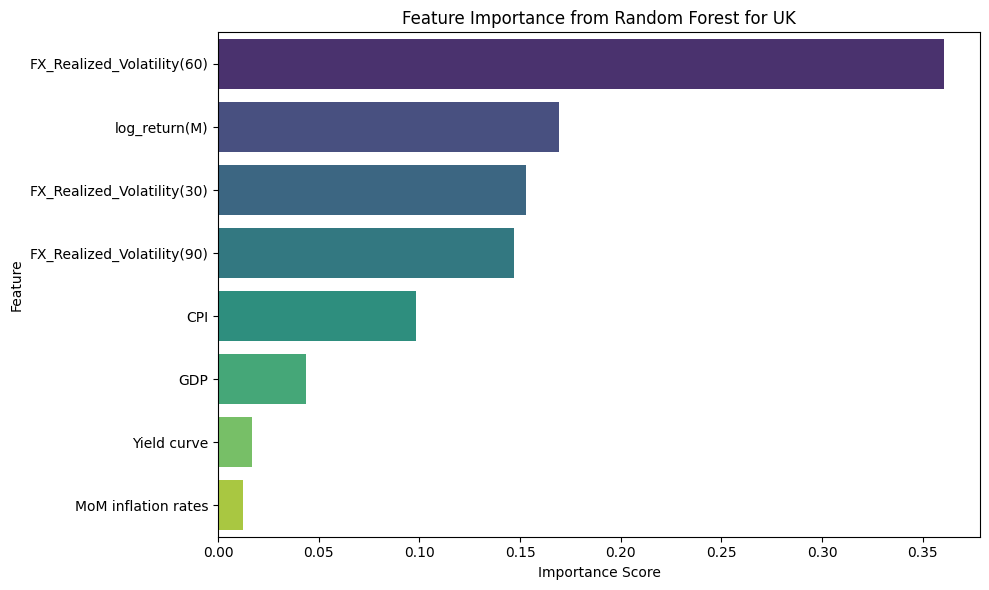

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_UK.feature_importances_

# Get the column names from train_X
feature_names = train_X_UK.columns

# dataframe fo importance of feutures
importance_df_UK = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_UK.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for UK')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

US: Random Forest

In [ ]:
# Initialize arrays to store mean and std of train/test accuracy for US dataset
train_acc_meanUS, train_acc_stdUS = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_meanUS, test_acc_stdUS = np.zeros((10, 8)), np.zeros((10, 8))

# Define ranges for number of trees and max depth
n_trees = np.arange(10, 101, 10)
depths = np.arange(1, 16, 2)

# Loop over combinations of trees and depths
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []

        # Train and evaluate model 5 times
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d)
            modelRFC = modelRFC.fit(train_X_US, train_y_US)
            train_perfs.append(modelRFC.score(train_X_US, train_y_US))
            test_perfs.append(modelRFC.score(test_X_US, test_y_US))

        # Store mean and std of scores
        train_acc_meanUS[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_stdUS[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_meanUS[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_stdUS[tree_idx][d_idx] = np.std(test_perfs)


100%|██████████| 10/10 [01:32<00:00,  9.22s/it]


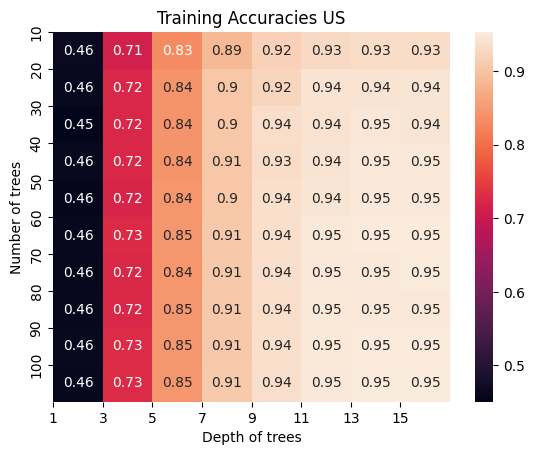

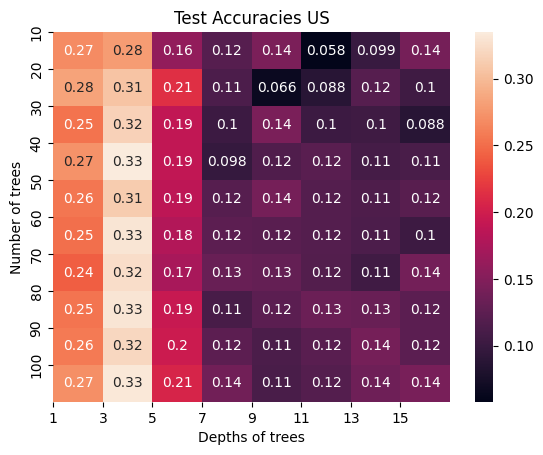

In [ ]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_meanUS, annot=True) # create seaborn heatmap with annotations
# add proper xticklabels and yticklabels
plt.yticks(ticks=np.arange(0,10), labels=np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
# add a title
plt.title("Training Accuracies US")
plt.ylabel("Number of trees")
plt.xlabel("Depth of trees")
plt.show()

# Figure 2
plt.figure()
# create seaborn heatmap with annotations
sns.heatmap(test_acc_meanUS, annot=True)
# add proper xticklabels and yticklabels
plt.yticks(np.arange(0,10), np.arange(10,101,10))
plt.xticks(np.arange(0,8), depths)
plt.ylabel("Number of trees")
plt.xlabel("Depths of trees")
# add a title
plt.title("Test Accuracies US")
plt.show()

In [ ]:
# Fine-tune tree and depth ranges for US dataset
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Initialize arrays to store mean and std of train/test accuracy
train_acc_meanUS_new = np.zeros((len(n_trees), len(depths)))
train_acc_stdUS_new = np.zeros((len(n_trees), len(depths)))
test_acc_meanUS_new = np.zeros((len(n_trees), len(depths)))
test_acc_stdUS_new = np.zeros((len(n_trees), len(depths)))

# Loop over combinations of trees and depths
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs_new = []
        test_perfs_new = []

        # Train and evaluate model 5 times for each config
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d, random_state=42)
            modelRFC = modelRFC.fit(train_X_US, train_y_US)
            train_perfs_new.append(modelRFC.score(train_X_US, train_y_US))
            test_perfs_new.append(modelRFC.score(test_X_US, test_y_US))

        # Store average and std of accuracy scores
        train_acc_meanUS_new[tree_idx][d_idx] = np.mean(train_perfs_new)
        train_acc_stdUS_new[tree_idx][d_idx] = np.std(train_perfs_new)
        test_acc_meanUS_new[tree_idx][d_idx] = np.mean(test_perfs_new)
        test_acc_stdUS_new[tree_idx][d_idx] = np.std(test_perfs_new)


100%|██████████| 11/11 [00:25<00:00,  2.34s/it]


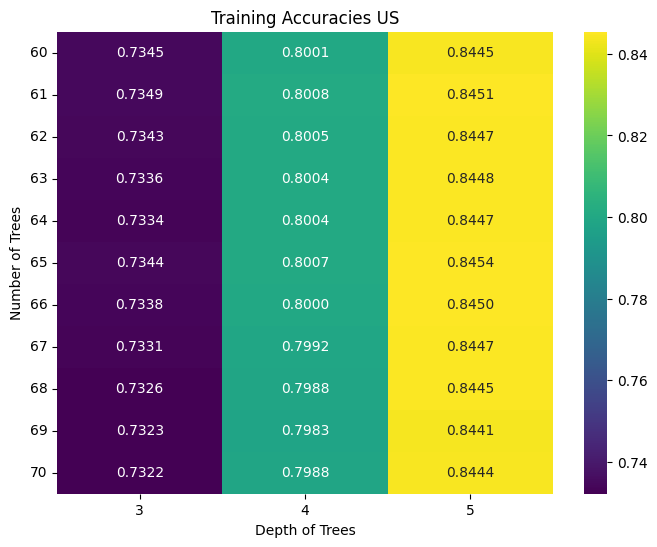

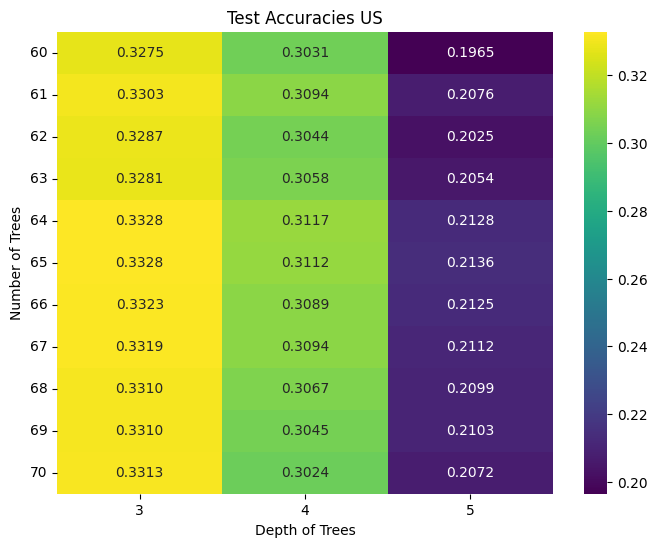

In [ ]:
n_trees = np.arange(60, 71, 1)
depths = np.arange(3, 6, 1)

# Plot training accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_meanUS_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Training Accuracies US")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

# Plot test accuracy heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_meanUS_new, annot=True, fmt=".4f", cmap="viridis")
plt.yticks(ticks=np.arange(len(n_trees)) + 0.5, labels=n_trees, rotation=0)
plt.xticks(ticks=np.arange(len(depths)) + 0.5, labels=depths)
plt.title("Test Accuracies US")
plt.ylabel("Number of Trees")
plt.xlabel("Depth of Trees")
plt.show()

Based on the test accuracy we can say that the best depth of the tree is 3 and the best number of trees is 64. We will run this model separately again to compute all the accuracy measures for the best selected model.

In [ ]:
# Train Random Forest
modelRFC_best_US = RFC(n_estimators=64, max_depth = 3, random_state=42)
modelRFC_best_US = modelRFC_best_US.fit(train_X_US, train_y_US)

# Predict and evaluate
y_pred_US = modelRFC_best_US.predict(test_X_US)
mae_US = mean_absolute_error(test_y_US, y_pred_US)
mse_US = mean_squared_error(test_y_US, y_pred_US)
r2_US = r2_score(test_y_US, y_pred_US)
rmse_US = np.sqrt(mse_US)
mape_US = mean_absolute_percentage_error(test_y_US, y_pred_US)
#Theil measure is not computed becaus eno build in function of the package like this exist

train_perfs_US = modelRFC_best_US.score(train_X_US, train_y_US)
test_perfs_US = modelRFC_best_US.score(test_X_US, test_y_US)

print(f"Mean Absolute Error: {mae_US}")
print(f"Mean Squared Error: {mse_US}")
print(f"R2 Score: {r2_US}")
print(f'RMSE: {rmse_US}')
print(f"Mean Absolute Percentage Error: {mape_US}")
print(f"Training accuracy: {train_perfs_US}")
print(f"Test accuracy: {test_perfs_US}")

Mean Absolute Error: 0.05175321897632106
Mean Squared Error: 0.007297408662332816
R2 Score: 0.3327616629565221
RMSE: 0.08542487145049044
Mean Absolute Percentage Error: 0.2843399244154322
Training accuracy: 0.7334053506841931
Test accuracy: 0.3327616629565221


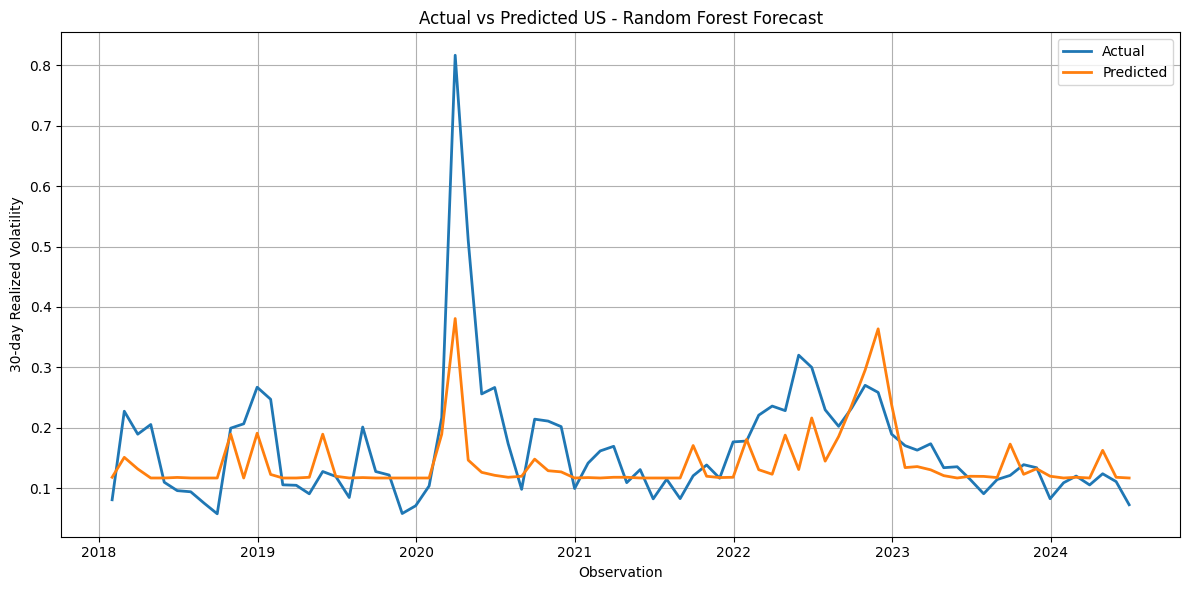

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_US['Date'], test_y_US.values, label='Actual', linewidth=2)
plt.plot(test_df_US['Date'], y_pred_US, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted US - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-90-3a3f2fe1ddfc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


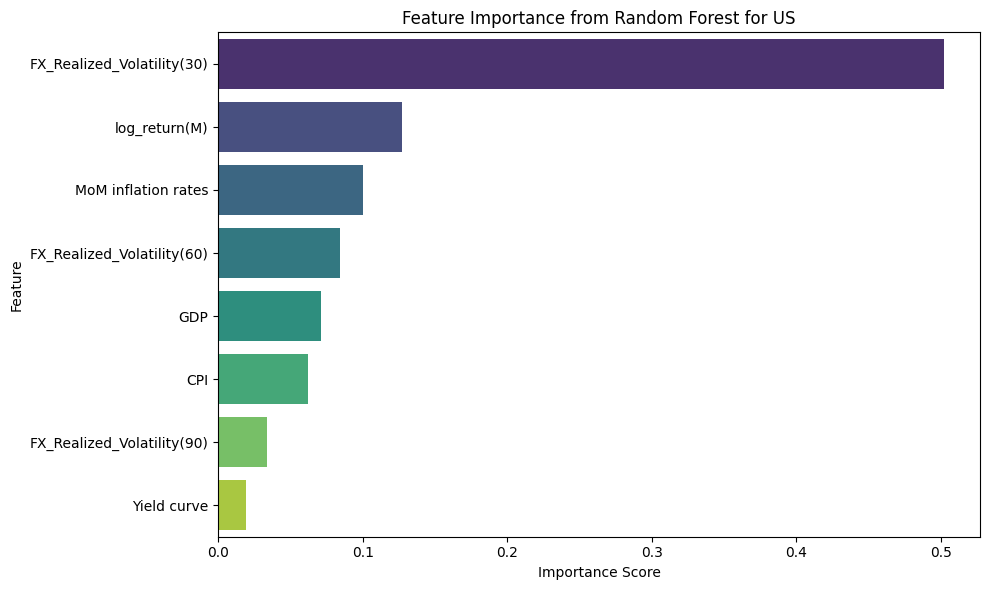

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_US.feature_importances_

# Get the column names from train_X
feature_names = train_X_US.columns

# dataframe fo importance of feutures
importance_df_US = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_US.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for US')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest
modelRFC_best_US = RFC(n_estimators=100000, max_depth = 3, random_state=42, n_jobs=-1)
modelRFC_best_US = modelRFC_best_US.fit(train_X_US, train_y_US)

# Predict and evaluate
y_pred_US = modelRFC_best_US.predict(test_X_US)
mae_US = mean_absolute_error(test_y_US, y_pred_US)
mse_US = mean_squared_error(test_y_US, y_pred_US)
r2_US = r2_score(test_y_US, y_pred_US)
rmse_US = np.sqrt(mse_US)
mape_US = mean_absolute_percentage_error(test_y_US, y_pred_US)
#Theil measure is not computed becaus eno build in function of the package like this exist

train_perfs_US = modelRFC_best_US.score(train_X_US, train_y_US)
test_perfs_US = modelRFC_best_US.score(test_X_US, test_y_US)

print(f"Mean Absolute Error: {mae_US}")
print(f"Mean Squared Error: {mse_US}")
print(f"R2 Score: {r2_US}")
print(f'RMSE: {rmse_US}')
print(f"Mean Absolute Percentage Error: {mape_US}")
print(f"Training accuracy: {train_perfs_US}")
print(f"Test accuracy: {test_perfs_US}")

Mean Absolute Error: 0.051812696187390705
Mean Squared Error: 0.007383221053249747
R2 Score: 0.32491540962707866
RMSE: 0.08592567167761767
Mean Absolute Percentage Error: 0.2775030256438629
Training accuracy: 0.7287724940741471
Test accuracy: 0.32491540962707854


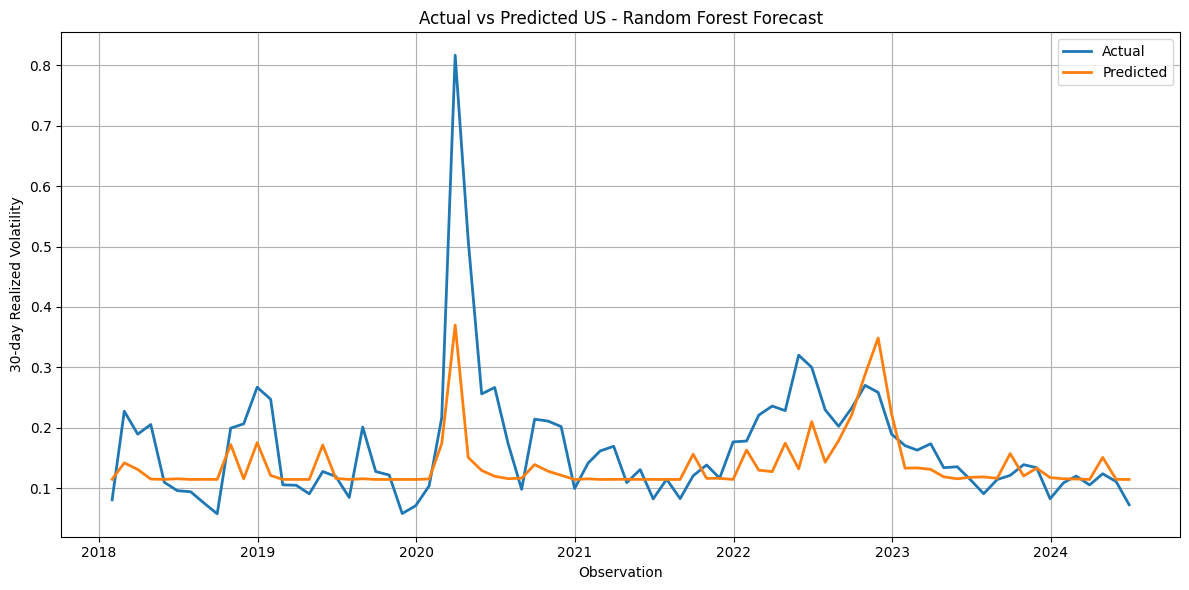

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_US['Date'], test_y_US.values, label='Actual', linewidth=2)
plt.plot(test_df_US['Date'], y_pred_US, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted US - Random Forest Forecast')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-36-3a3f2fe1ddfc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


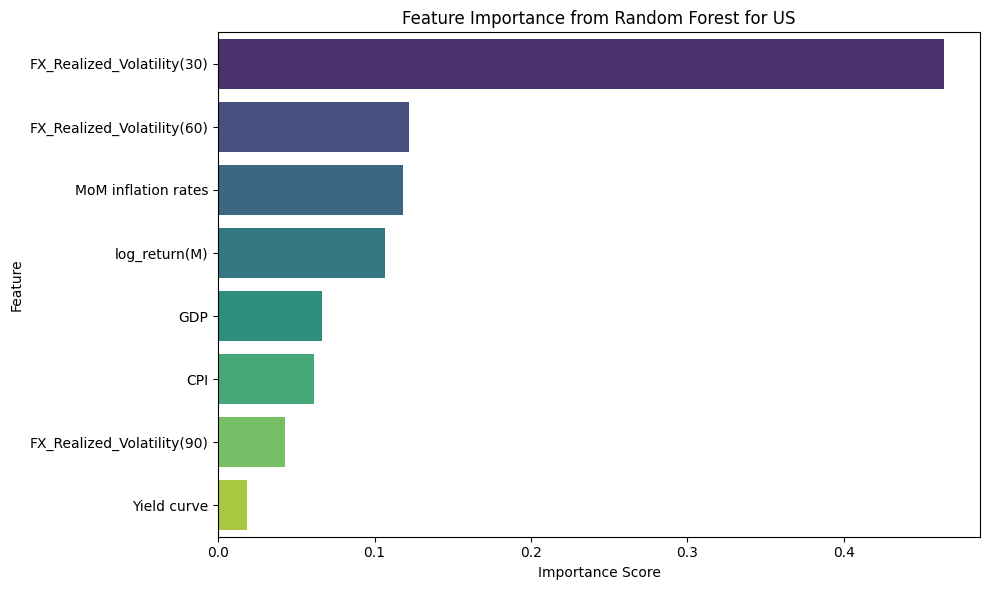

In [ ]:
# Get the importance of feutures
importances = modelRFC_best_US.feature_importances_

# Get the column names from train_X
feature_names = train_X_US.columns

# dataframe fo importance of feutures
importance_df_US = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df_US.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest for US')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **XGBoost**

**Australia: XGBoost**

In [ ]:
# Import all the necessary packages to run the XGBoost
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

The gridsearch below takes approx 5 minutes to run

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],  # L2 regularization (lambda)
    'reg_alpha': [0, 0.5, 1]   # L1 regularization (alpha)
}

xgb_model_AUS = XGBRegressor(objective='reg:squarederror')
grid_search_AUS = GridSearchCV(xgb_model_AUS, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_AUS.fit(train_X_AUS, train_y_AUS)

print(grid_search_AUS.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}


In [ ]:
# Print the best (lowest) negative RMSE score from cross-validation
print("Best score: ", grid_search_AUS.best_score_)

Best score:  -0.08869871227743063


In [ ]:
# Get the best model found during grid search
best_model_AUS = grid_search_AUS.best_estimator_

# Make predictions on the test set using the best model
predictions_AUS = best_model_AUS.predict(test_X_AUS)

In [ ]:
# Evaluate prediction
mae_xgb_AUS = mean_absolute_error(test_y_AUS, predictions_AUS)
mse_xgb_AUS = mean_squared_error(test_y_AUS, predictions_AUS)
r2_xgb_AUS = r2_score(test_y_AUS, predictions_AUS)
rmse_xgb_AUS = np.sqrt(mse_AUS)
mape_xgb_AUS = mean_absolute_percentage_error(test_y_AUS, predictions_AUS)

print(f"Mean Absolute Error: {mae_xgb_AUS}")
print(f"Mean Squared Error: {mse_xgb_AUS}")
print(f"R2 Score: {r2_xgb_AUS}")
print(f'RMSE: {rmse_xgb_AUS}')
print(f"Mean Absolute Percentage Error: {mape_xgb_AUS}")

Mean Absolute Error: 0.05129971179776416
Mean Squared Error: 0.011597113468269221
R2 Score: 0.3755086882641401
RMSE: 0.09287444816418466
Mean Absolute Percentage Error: 0.20811076612233934


In [ ]:
# Evaluate the best XGBoost model on training and test sets
train_perfs_xgb_AUS = best_model_AUS.score(train_X_AUS, train_y_AUS)
test_perfs_xgb_AUS = best_model_AUS.score(test_X_AUS, test_y_AUS)

print(f"Training accuracy: {train_perfs_xgb_AUS}")
print(f"Test accuracy: {test_perfs_xgb_AUS}")


Training accuracy: 0.9587212169351541
Test accuracy: 0.3755086882641401


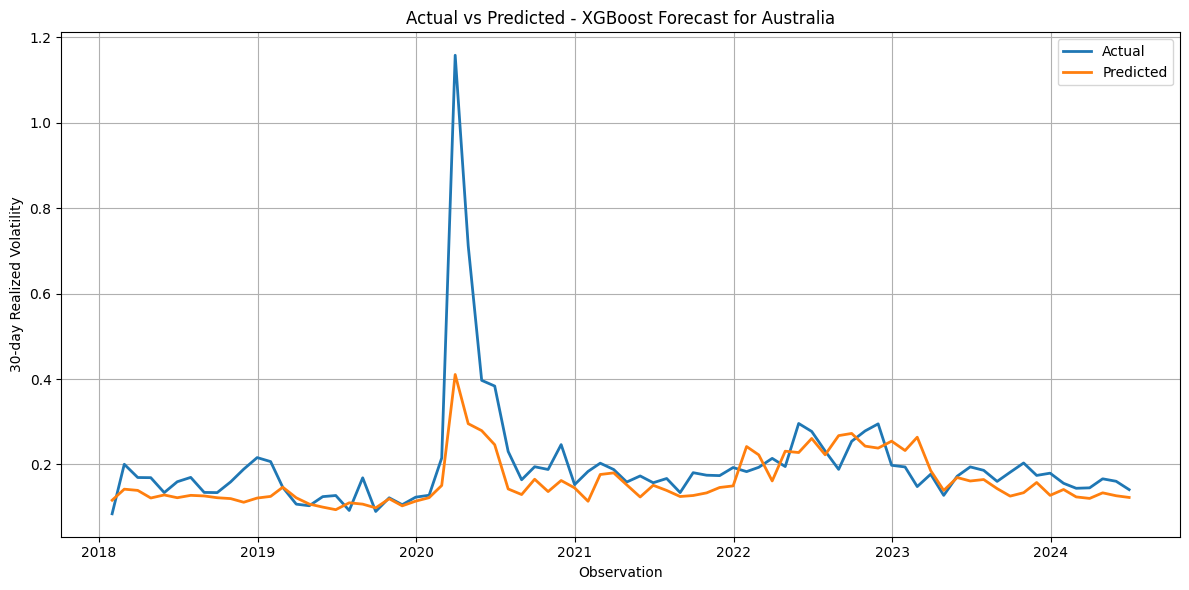

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_AUS['Date'], test_y_AUS.values, label='Actual', linewidth=2)
plt.plot(test_df_AUS['Date'], predictions_AUS, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted - XGBoost Forecast for Australia')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-98-b1eef4b67c1e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_AUS, palette='viridis')


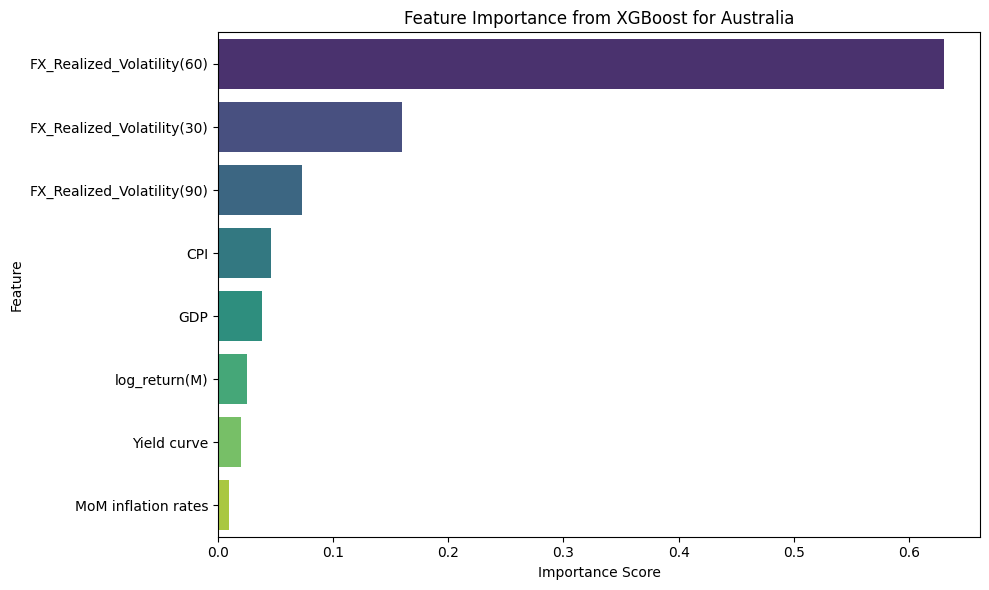

In [ ]:
# Get the importance of feutures
importances_xgb = best_model_AUS.feature_importances_

# Get the column names from train_X
feature_names = train_X_AUS.columns

# dataframe fo importance of feutures
importance_df_xgb_AUS = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

importance_df_xgb_AUS = importance_df_xgb_AUS.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_AUS, palette='viridis')
plt.title('Feature Importance from XGBoost for Australia')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Germany: XGBoost**

The gridsearch below runs for approximately 5 min 20 seconds

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],  # L2 regularization (lambda)
    'reg_alpha': [0, 0.5, 1]   # L1 regularization (alpha)
}

xgb_model_GERM = XGBRegressor(objective='reg:squarederror')
grid_search_GERM = GridSearchCV(xgb_model_GERM, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_GERM.fit(train_X_GERM, train_y_GERM)

print(grid_search_GERM.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}


In [ ]:
# Print the best (lowest) negative RMSE score from cross-validation
print("Best score: ", grid_search_GERM.best_score_)

Best score:  -0.10200796969229708


In [ ]:
# Get the best model found from the German dataset grid search
best_model_GERM = grid_search_GERM.best_estimator_

# Make predictions on the German test set using the best model
predictions_GERM = best_model_GERM.predict(test_X_GERM)

In [ ]:
# Evaluate prediction
mae_xgb_GERM = mean_absolute_error(test_y_GERM, predictions_GERM)
mse_xgb_GERM = mean_squared_error(test_y_GERM, predictions_GERM)
r2_xgb_GERM = r2_score(test_y_GERM, predictions_GERM)
rmse_xgb_GERM = np.sqrt(mse_GERM)
mape_xgb_GERM = mean_absolute_percentage_error(test_y_GERM, predictions_GERM)

print(f"Mean Absolute Error: {mae_xgb_GERM}")
print(f"Mean Squared Error: {mse_xgb_GERM}")
print(f"R2 Score: {r2_xgb_GERM}")
print(f'RMSE: {rmse_xgb_GERM}')
print(f"Mean Absolute Percentage Error: {mape_xgb_GERM}")

Mean Absolute Error: 0.06413067052780616
Mean Squared Error: 0.00994898100137626
R2 Score: 0.08107431293600575
RMSE: 0.0770362002307976
Mean Absolute Percentage Error: 0.2887461791767869


In [ ]:
# Evaluate the best XGBoost model on training and test sets (Germany)
train_perfs_xgb_GERM = best_model_GERM.score(train_X_GERM, train_y_GERM)
test_perfs_xgb_GERM = best_model_GERM.score(test_X_GERM, test_y_GERM)

print(f"Training accuracy: {train_perfs_xgb_GERM}")
print(f"Test accuracy: {test_perfs_xgb_GERM}")

Training accuracy: 0.9360117663101336
Test accuracy: 0.08107431293600575


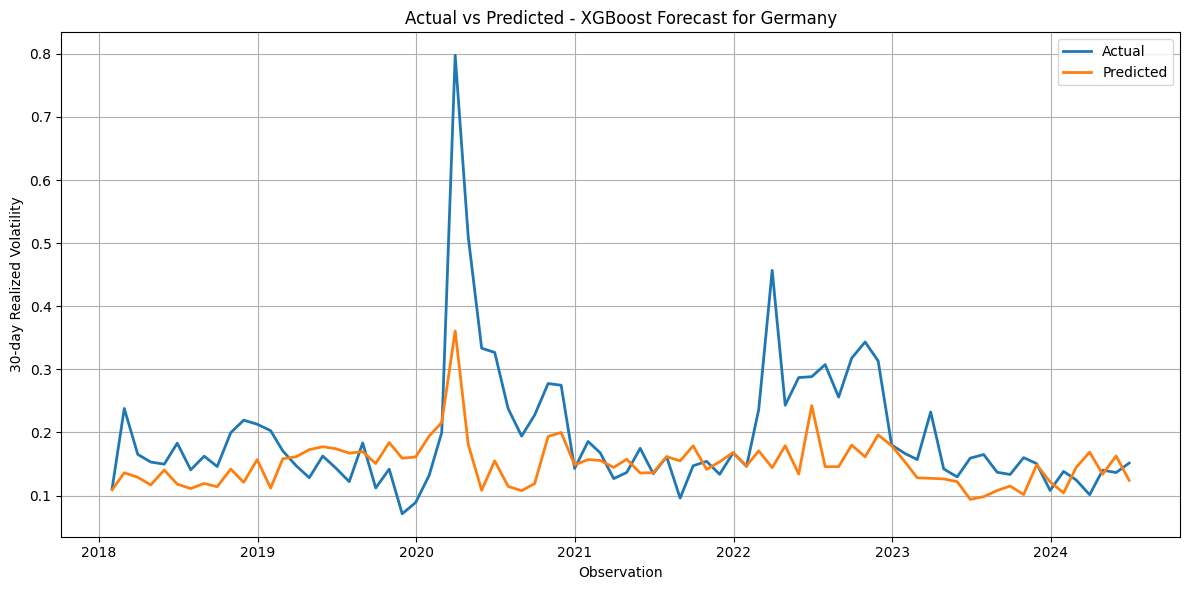

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_GERM['Date'], test_y_GERM.values, label='Actual', linewidth=2)
plt.plot(test_df_GERM['Date'], predictions_GERM, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted - XGBoost Forecast for Germany')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-105-730fdc1fd4ce>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_GERM, palette='viridis')


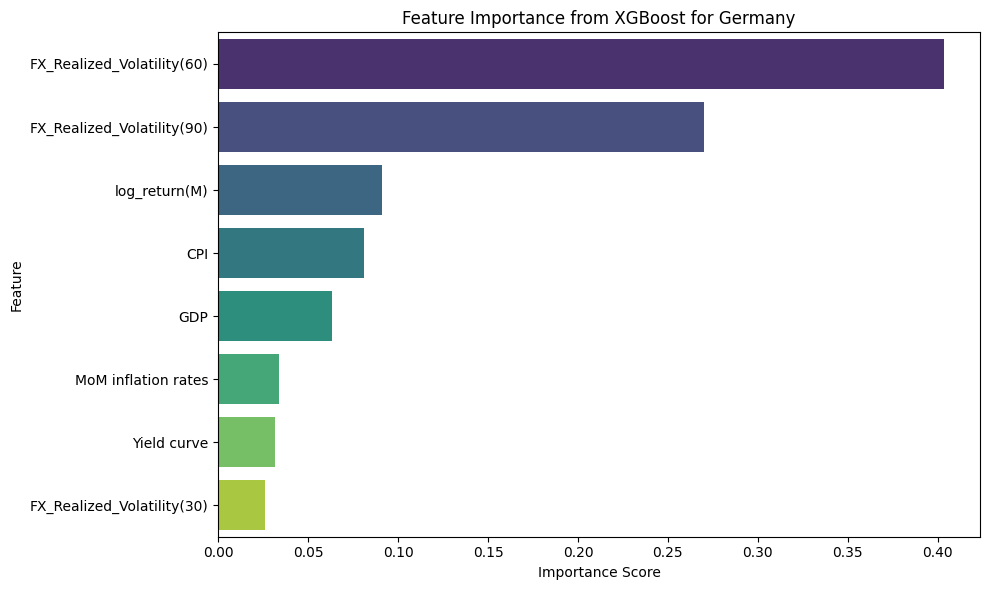

In [ ]:
# Get the importance of feutures
importances_xgb = best_model_GERM.feature_importances_

# Get the column names from train_X
feature_names = train_X_GERM.columns

# dataframe of importance of feutures
importance_df_xgb_GERM = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

importance_df_xgb_GERM = importance_df_xgb_GERM.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_GERM, palette='viridis')
plt.title('Feature Importance from XGBoost for Germany')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Japan: XGBoost**

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],  # L2 regularization (lambda)
    'reg_alpha': [0, 0.5, 1]   # L1 regularization (alpha)
}

xgb_model_JAP = XGBRegressor(objective='reg:squarederror')
grid_search_JAP = GridSearchCV(xgb_model_JAP, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_JAP.fit(train_X_JAP, train_y_JAP)

print(grid_search_JAP.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 10}


In [ ]:
# Print the best (lowest) negative RMSE score from cross-validation
print("Best score: ", grid_search_JAP.best_score_)

Best score:  -0.07532902789101217


In [ ]:
# Get the best model found from the Japan dataset grid search
best_model_JAP = grid_search_JAP.best_estimator_

# Make predictions on the Japan test set using the best model
predictions_JAP = best_model_JAP.predict(test_X_JAP)

In [ ]:
# Evaluate prediction
mae_xgb_JAP = mean_absolute_error(test_y_JAP, predictions_JAP)
mse_xgb_JAP = mean_squared_error(test_y_JAP, predictions_JAP)
r2_xgb_JAP = r2_score(test_y_JAP, predictions_JAP)
rmse_xgb_JAP = np.sqrt(mse_JAP)
mape_xgb_JAP = mean_absolute_percentage_error(test_y_JAP, predictions_JAP)
train_perfs_xgb_JAP = best_model_JAP.score(train_X_JAP, train_y_JAP)
test_perfs_xgb_JAP = best_model_JAP.score(test_X_JAP, test_y_JAP)

print(f"Training accuracy: {train_perfs_xgb_JAP}")
print(f"Test accuracy: {test_perfs_xgb_JAP}")
print(f"Mean Absolute Error: {mae_xgb_JAP}")
print(f"Mean Squared Error: {mse_xgb_JAP}")
print(f"R2 Score: {r2_xgb_JAP}")
print(f'RMSE: {rmse_xgb_JAP}')
print(f"Mean Absolute Percentage Error: {mape_xgb_JAP}")

Training accuracy: 0.7840943490745316
Test accuracy: -0.10383029455939874
Mean Absolute Error: 0.04767792711307193
Mean Squared Error: 0.004571520714402769
R2 Score: -0.10383029455939874
RMSE: 0.06410455856374798
Mean Absolute Percentage Error: 0.2848234510806197


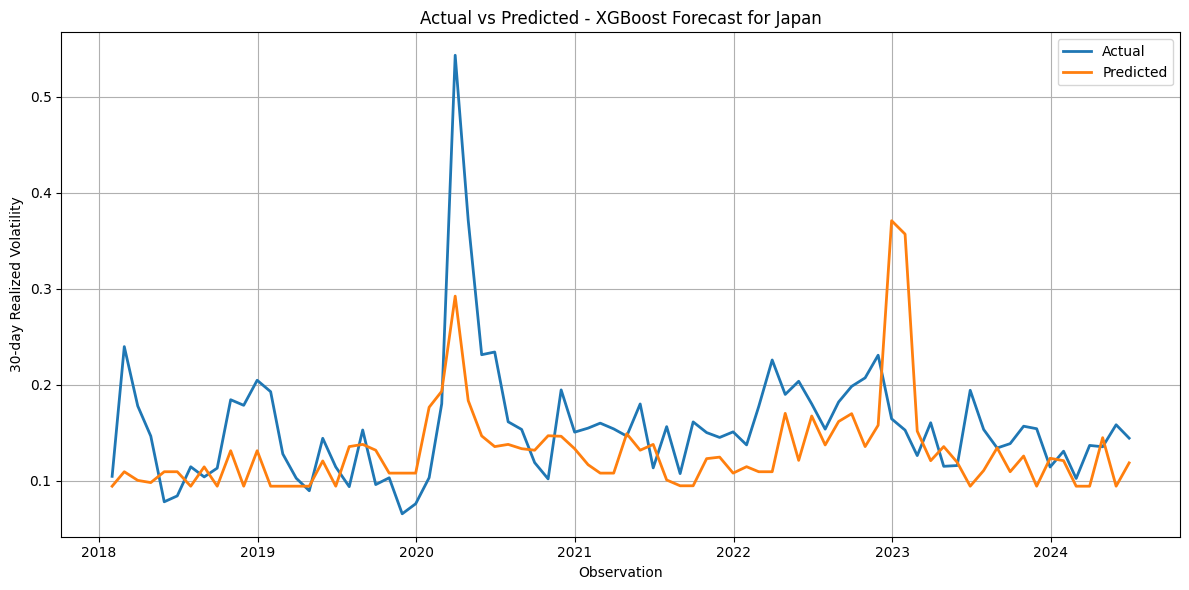

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_JAP['Date'], test_y_JAP.values, label='Actual', linewidth=2)
plt.plot(test_df_JAP['Date'], predictions_JAP, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted - XGBoost Forecast for Japan')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-111-4cabc72f69bf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_JAP, palette='viridis')


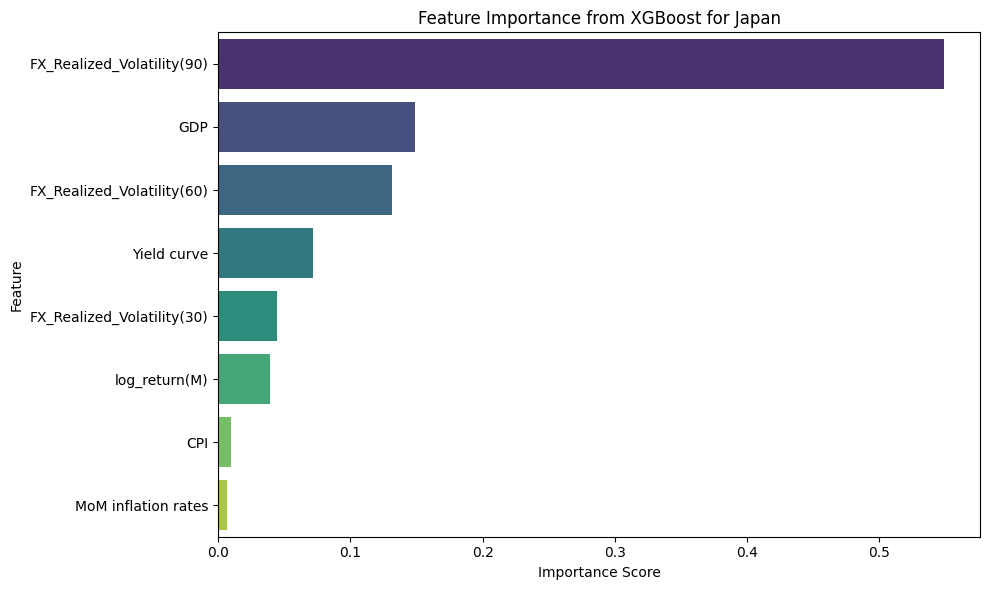

In [ ]:
# Get the importance of feutures
importances_xgb = best_model_JAP.feature_importances_

# Get the column names from train_X
feature_names = train_X_JAP.columns

# dataframe of importance of feutures
importance_df_xgb_JAP = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

importance_df_xgb_JAP = importance_df_xgb_JAP.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_JAP, palette='viridis')
plt.title('Feature Importance from XGBoost for Japan')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**UK: XGBoost**

In [ ]:
# Grid search
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],  # L2 regularization (lambda)
    'reg_alpha': [0, 0.5, 1]   # L1 regularization (alpha)
}

xgb_model_UK = XGBRegressor(objective='reg:squarederror')
grid_search_UK = GridSearchCV(xgb_model_UK, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_UK.fit(train_X_UK, train_y_UK)

print(grid_search_UK.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 10}


In [ ]:
# Print the best (lowest) negative RMSE score from cross-validation
print("Best score: ", grid_search_UK.best_score_)

Best score:  -0.09114873039995405


In [ ]:
# Get the best model found from the UK dataset grid search
best_model_UK = grid_search_UK.best_estimator_

# Make predictions on the UK test set using the best model
predictions_UK = best_model_UK.predict(test_X_UK)

In [ ]:
# Evaluate predictions
mae_xgb_UK = mean_absolute_error(test_y_UK, predictions_UK)
mse_xgb_UK = mean_squared_error(test_y_UK, predictions_UK)
r2_xgb_UK = r2_score(test_y_UK, predictions_UK)
rmse_xgb_UK = np.sqrt(mse_UK)
mape_xgb_UK = mean_absolute_percentage_error(test_y_UK, predictions_UK)
train_perfs_xgb_UK = best_model_UK.score(train_X_UK, train_y_UK)
test_perfs_xgb_UK = best_model_UK.score(test_X_UK, test_y_UK)

print(f"Training accuracy: {train_perfs_xgb_UK}")
print(f"Test accuracy: {test_perfs_xgb_UK}")
print(f"Mean Absolute Error: {mae_xgb_UK}")
print(f"Mean Squared Error: {mse_xgb_UK}")
print(f"R2 Score: {r2_xgb_UK}")
print(f'RMSE: {rmse_xgb_UK}')
print(f"Mean Absolute Percentage Error: {mape_xgb_UK}")

Training accuracy: 0.7969261632108324
Test accuracy: 0.34485708243235635
Mean Absolute Error: 0.051948868205922594
Mean Squared Error: 0.00683247900004789
R2 Score: 0.34485708243235635
RMSE: 0.06423270039426644
Mean Absolute Percentage Error: 0.2580063858226362


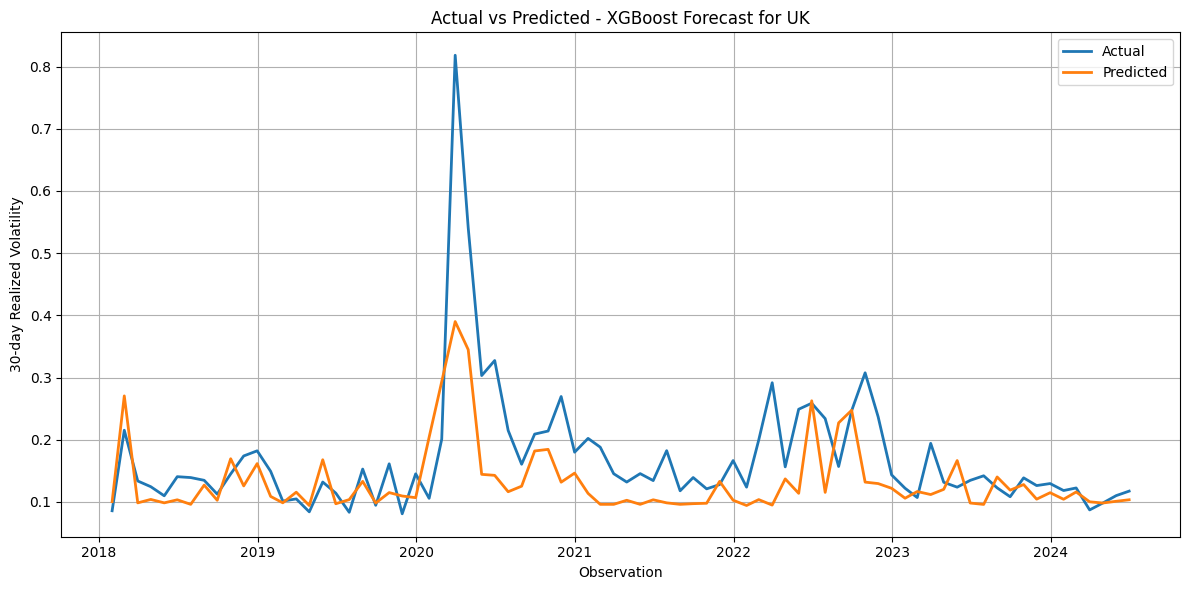

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_UK['Date'], test_y_UK.values, label='Actual', linewidth=2)
plt.plot(test_df_UK['Date'], predictions_UK, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted - XGBoost Forecast for UK')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-118-0f23c79be846>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_UK, palette='viridis')


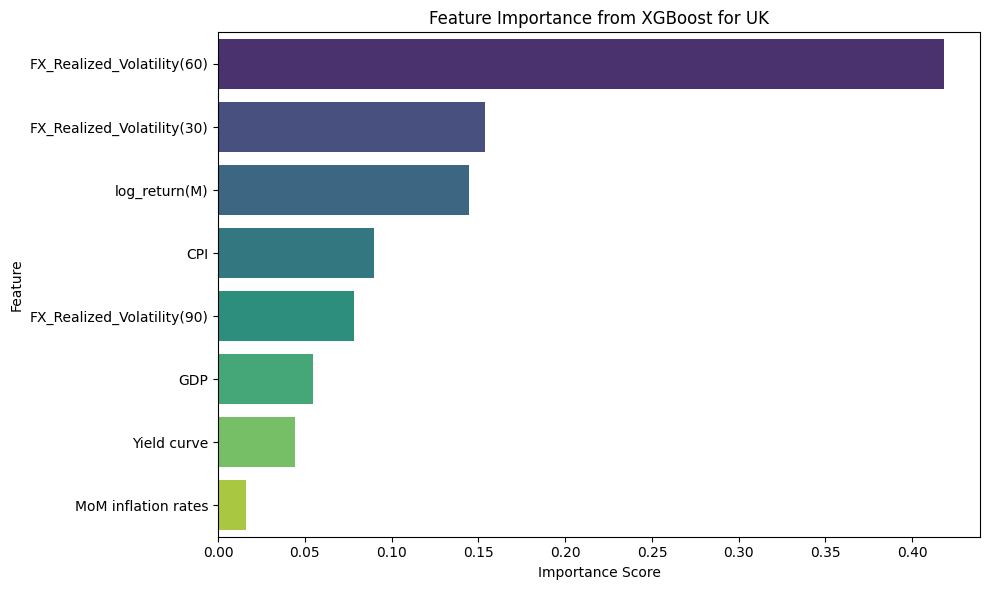

In [ ]:
# Get the importance of feutures
importances_xgb = best_model_UK.feature_importances_

# Get the column names from train_X
feature_names = train_X_UK.columns

# dataframe of importance of feutures
importance_df_xgb_UK = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

importance_df_xgb_UK = importance_df_xgb_UK.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_UK, palette='viridis')
plt.title('Feature Importance from XGBoost for UK')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**US: XGBoost**

In [ ]:
# Grid search
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10],  # L2 regularization (lambda)
    'reg_alpha': [0, 0.5, 1]   # L1 regularization (alpha)
}

xgb_model_US = XGBRegressor(objective='reg:squarederror')
grid_search_US = GridSearchCV(xgb_model_US, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_US.fit(train_X_US, train_y_US)

print(grid_search_US.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5}


In [ ]:
# Print the best (lowest) negative RMSE score from cross-validation
print("Best score: ", grid_search_US.best_score_)

Best score:  -0.07226622031336649


In [ ]:
# Get the best model found from the US dataset grid search
best_model_US = grid_search_US.best_estimator_

# Make predictions on the US test set using the best model
predictions_US = best_model_US.predict(test_X_US)

In [ ]:
# Evaluate predictions
mae_xgb_US = mean_absolute_error(test_y_US, predictions_US)
mse_xgb_US = mean_squared_error(test_y_US, predictions_US)
r2_xgb_US = r2_score(test_y_US, predictions_US)
rmse_xgb_US = np.sqrt(mse_US)
mape_xgb_US = mean_absolute_percentage_error(test_y_US, predictions_US)
train_perfs_xgb_US = best_model_US.score(train_X_US, train_y_US)
test_perfs_xgb_US = best_model_US.score(test_X_US, test_y_US)

print(f"Training accuracy: {train_perfs_xgb_US}")
print(f"Test accuracy: {test_perfs_xgb_US}")
print(f"Mean Absolute Error: {mae_xgb_US}")
print(f"Mean Squared Error: {mse_xgb_US}")
print(f"R2 Score: {r2_xgb_US}")
print(f'RMSE: {rmse_xgb_US}')
print(f"Mean Absolute Percentage Error: {mape_xgb_US}")

Training accuracy: 0.8928789534140167
Test accuracy: 0.15978652978433894
Mean Absolute Error: 0.06538867286218476
Mean Squared Error: 0.00918919180053192
R2 Score: 0.15978652978433894
RMSE: 0.08542487145049044
Mean Absolute Percentage Error: 0.33630638977757


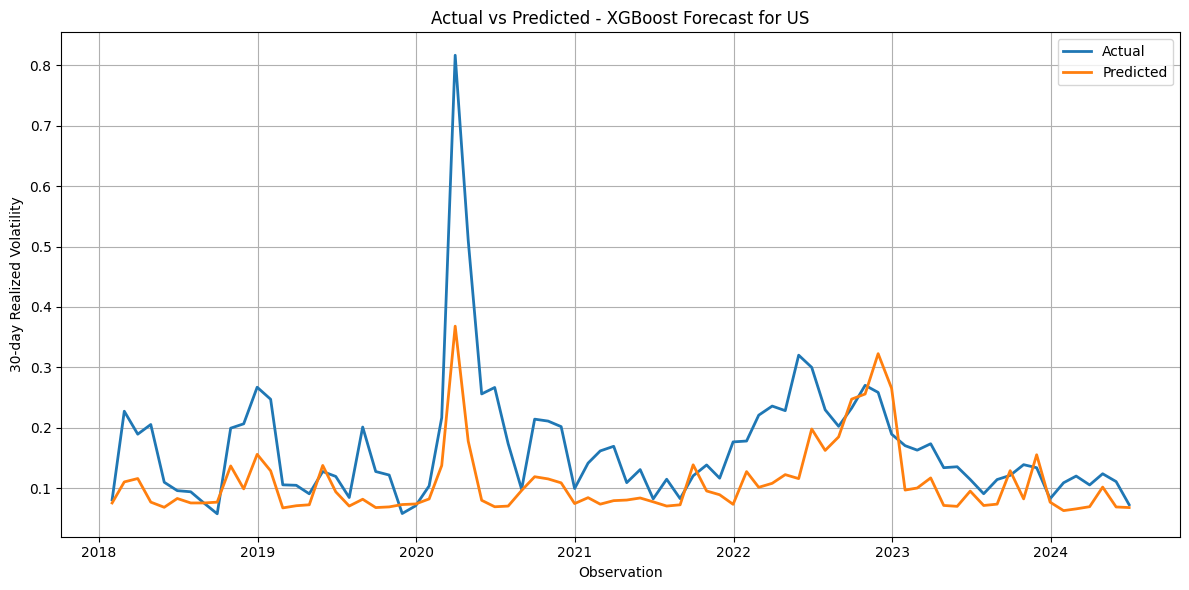

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_df_US['Date'], test_y_US.values, label='Actual', linewidth=2)
plt.plot(test_df_US['Date'], predictions_US, label='Predicted', linewidth=2)

plt.title('Actual vs Predicted - XGBoost Forecast for US')
plt.xlabel('Observation')
plt.ylabel('30-day Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-124-a926fa8bb557>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_US, palette='viridis')


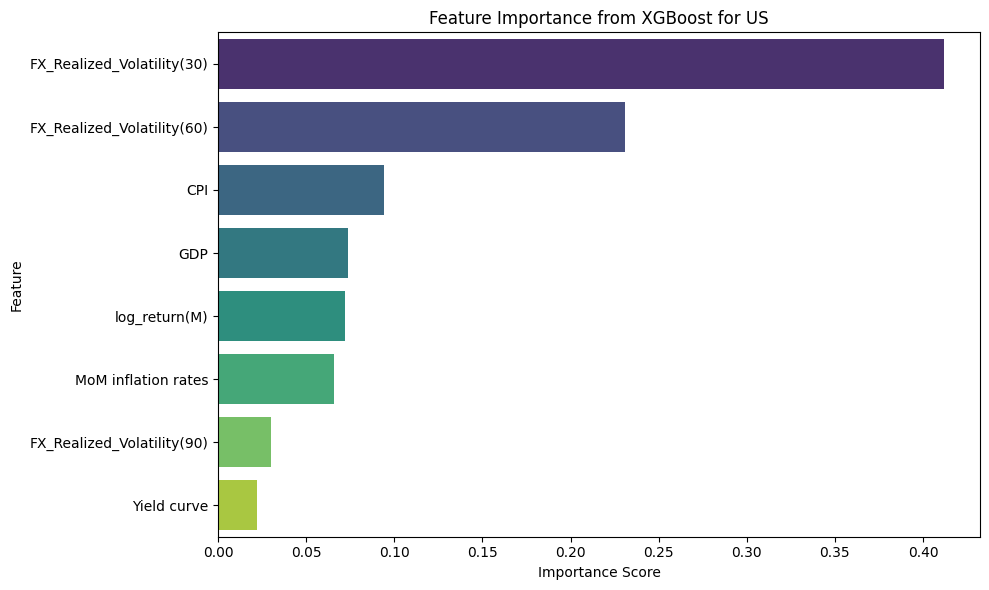

In [ ]:
# Get the importance of feutures
importances_xgb = best_model_US.feature_importances_

# Get the column names from train_X
feature_names = train_X_US.columns

# dataframe of importance of feutures
importance_df_xgb_US = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

importance_df_xgb_US = importance_df_xgb_US.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb_US, palette='viridis')
plt.title('Feature Importance from XGBoost for US')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **LSTM**

LSTM: Australia

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Features preparation for X matrix

In [ ]:
# Select features and target from the Australian dataset
# Exclude 'Date' and target column 'realized_vol_30d'; keep 8 features
features_AUS = df_AUS.drop(columns=['Date', 'realized_vol_30d'])
target = df_AUS['realized_vol_30d']

# Initialize MinMaxScalers for features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale features to [0, 1] range
features_scaled = feature_scaler.fit_transform(features_AUS)

# Scale target values to [0, 1] range and reshape to 2D
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))


In [ ]:
# Set your sequence length
sequence_length = 6

In [ ]:
# Function to create input-output sequences for multivariate time series
def create_sequences_multivariate(X_data, y_data, seq_length):
    X_seq, y_seq = [], []

    # Slide a window of size 'seq_length' across the data
    for i in range(len(X_data) - seq_length):
        # Extract sequence of features
        X_seq.append(X_data[i:i+seq_length])
        # Corresponding target is the value right after the sequence
        y_seq.append(y_data[i + seq_length])

    return np.array(X_seq), np.array(y_seq)


In [ ]:
# Split the scaled data into 80% training and 20% testing sets
train_size = int(len(features_scaled) * 0.80)

# Training features and targets
X_train_full = features_scaled[:train_size]
y_train_full = target_scaled[:train_size]

# Testing features and targets
X_test_full = features_scaled[train_size:]
y_test_full = target_scaled[train_size:]


In [ ]:
# Create sequences
X_train, y_train = create_sequences_multivariate(X_train_full, y_train_full, sequence_length)
X_test, y_test = create_sequences_multivariate(X_test_full, y_test_full, sequence_length)

# Reshape X to be [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], sequence_length, features_AUS.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, features_AUS.shape[1]))

In [ ]:
# Get number of features from input shape
num_features = X_train.shape[2]  # This replaces the '1' in input_shape

# Build the LSTM model for multivariate input
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(1)  # Still 1 because you're predicting a single value (realized_vol_30d)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0214 - val_loss: 0.0066
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0286 - val_loss: 0.0077
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228 - val_loss: 0.0042
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - val_loss: 0.0053
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0028
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_loss: 0.0048
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - val_loss: 0.0032
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.0038
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0026
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - val_loss: 0.0033
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0025
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_l

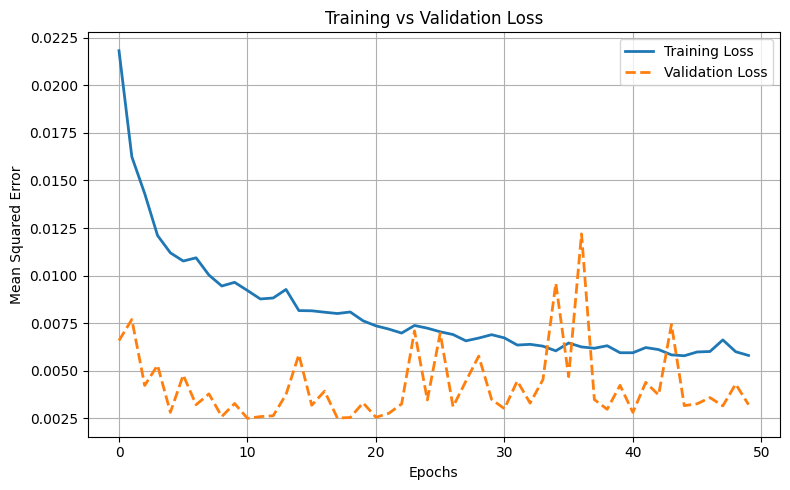

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


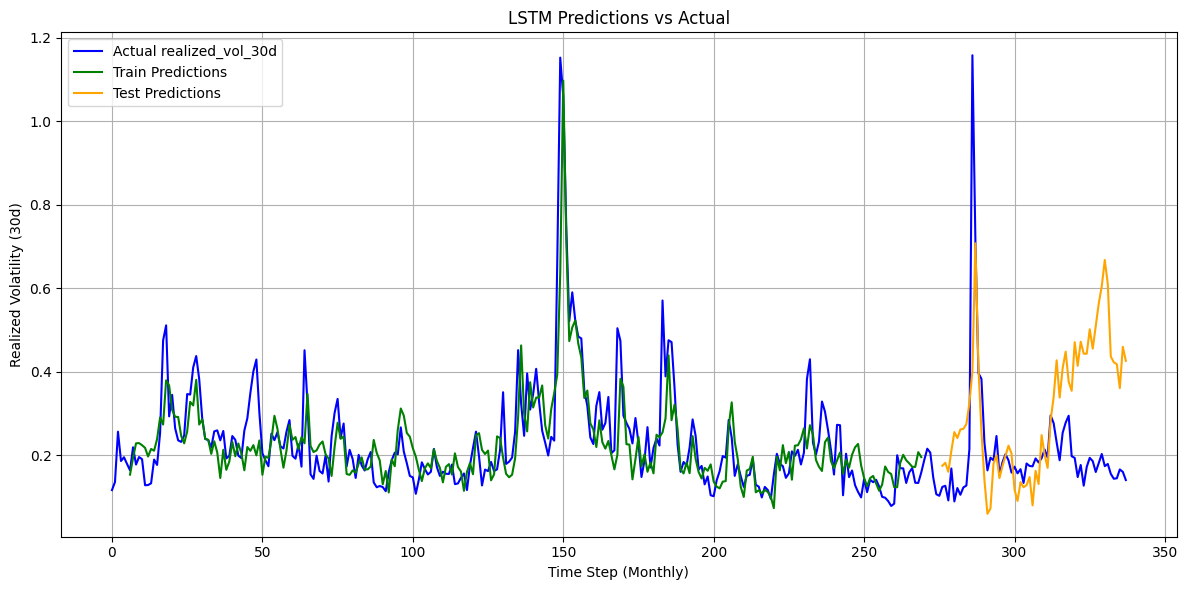

Train Score: 0.0059 MSE
Test Score: 0.0453 MSE


In [ ]:
# Predict on the train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert scaling for predictions and actuals
train_preds_inv = target_scaler.inverse_transform(train_preds)
y_train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))

test_preds_inv = target_scaler.inverse_transform(test_preds)
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare placeholders for plotting (based on total length of target series)
total_length = len(df_AUS)
plot_length = total_length

# Create an empty array filled with NaNs for plotting training predictions
trainPredictPlot = np.full((plot_length,), np.nan)

# Insert the inverse-scaled training predictions at the correct positions
trainPredictPlot[sequence_length:len(train_preds_inv) + sequence_length] = train_preds_inv.flatten()

# Create an empty array filled with NaNs for plotting test predictions
testPredictPlot = np.full((plot_length,), np.nan)

# Insert the inverse-scaled test predictions after the training sequence
testPredictPlot[len(train_preds_inv) + 2 * sequence_length:len(train_preds_inv) + 2 * sequence_length + len(test_preds_inv)] = test_preds_inv.flatten()

actualPlot = df_AUS['realized_vol_30d'].values  # Original target values

# Plot actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(actualPlot, label="Actual realized_vol_30d", color='blue')
plt.plot(trainPredictPlot, label="Train Predictions", color='green')
plt.plot(testPredictPlot, label="Test Predictions", color='orange')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("Realized Volatility (30d)")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print MSE scores
train_score = mean_squared_error(y_train_actual, train_preds_inv)
print(f'Train Score: {train_score:.4f} MSE')

test_score = mean_squared_error(y_test_actual, test_preds_inv)
print(f'Test Score: {test_score:.4f} MSE')

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [ ]:
# Define metrics
train_mae = mean_absolute_error(y_train_actual, train_preds_inv)
test_mae = mean_absolute_error(y_test_actual, test_preds_inv)

train_mse = mean_squared_error(y_train_actual, train_preds_inv)
test_mse = mean_squared_error(y_test_actual, test_preds_inv)

train_r2 = r2_score(y_train_actual, train_preds_inv)
test_r2 = r2_score(y_test_actual, test_preds_inv)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Percentage Error (handle divide-by-zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_preds_inv)
test_mape = mean_absolute_percentage_error(y_test_actual, test_preds_inv)

# Print metrics (like your example)
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAE: 0.0526
Test MAE: 0.1547
Training MSE: 0.0059
Test MSE: 0.0453
Training RMSE: 0.0769
Test RMSE: 0.2129
Training R² Score: 0.6519
Test R² Score: -1.0247
Training MAPE: 23.19%
Test MAPE: 86.53%


Feature Importance: Australia

Permutation Importance is used as there is no build-in feature importance method available for LSTM like it is for Random Forest or XGBoost.

In [ ]:
from sklearn.metrics import mean_squared_error

def permutation_feature_importance(model, X, y, metric_func, baseline_score=None):

    # Make a copy of dataset
    X_permuted = np.copy(X)
    # Get the number of features
    num_features = X.shape[2]

    # Since we do not have baseline_score we have to calculate it from original modal performance on unmodified data
    if baseline_score is None:
        y_pred = model.predict(X)
        baseline_score = metric_func(y, y_pred)

    importances = []

    for feature in range(num_features):
        X_temp = np.copy(X_permuted)

        #Shuffle the values to see how much worse the model will perfrom
        for t in range(X.shape[1]):
            np.random.shuffle(X_temp[:, t, feature])

        y_pred_perm = model.predict(X_temp)
        perm_score = metric_func(y, y_pred_perm)

        # Difference between the original perfromance and the shuffled one is the importance feature
        importance = perm_score - baseline_score
        importances.append(importance)

    return np.array(importances)

From this code we can extract valuable insights on the importance of the feautures for LSTM for Australia. The higher the MSE, the more important this feature will be. Some features received negative scores, which means that shuffling the feature improved the model's performance on the test set. These features are GDP, CPI, monthly change in inflation rate and yield curve. This means that these variables can be hurting the model by introducing noise.

In [ ]:
# Compute feature importances on test set
importances = permutation_feature_importance(
    model, X_test, y_test, mean_squared_error
)

# Display with feature names
feature_names = df_AUS.drop(columns=["Date", "realized_vol_30d"]).columns
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
log_return(M): 0.0044
GDP: -0.0054
CPI: -0.0077
FX_Realized_Volatility(30): 0.0039
FX_Realized_Volatility(60): 0.0019
FX_Realized_Volatility(90): 0.0024
MoM inflation rates: -0.0055
Yield curve: -0.0149


LSTM: Germany

In [ ]:
# Select the features . Here we have 8 feautures
features_GERM = df_GERM.drop(columns = ['Date', 'realized_vol_30d'])
target = df_GERM['realized_vol_30d']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features_scaled = feature_scaler.fit_transform(features_GERM)
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Set your sequence length
sequence_length = 6

# Function to create sequences with multiple features
def create_sequences_multivariate(X_data, y_data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - seq_length):
        X_seq.append(X_data[i:i+seq_length])
        y_seq.append(y_data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

train_size = int(len(features_scaled) * 0.80)
X_train_full = features_scaled[:train_size]
y_train_full = target_scaled[:train_size]

X_test_full = features_scaled[train_size:]
y_test_full = target_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences_multivariate(X_train_full, y_train_full, sequence_length)
X_test, y_test = create_sequences_multivariate(X_test_full, y_test_full, sequence_length)

# Reshape X to be [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], sequence_length, features_GERM.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, features_GERM.shape[1]))

# Get number of features from input shape
num_features = X_train.shape[2]  # This replaces the '1' in input_shape

# Build the LSTM model for multivariate input
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(1)  # Still 1 because you're predicting a single value (realized_vol_30d)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0369 - val_loss: 0.0184
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0174 - val_loss: 0.0156
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - val_loss: 0.0070
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - val_loss: 0.0107
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - val_loss: 0.0215
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - val_loss: 0.0204
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - val_loss: 0.0100
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0231 - val_loss: 0.0106
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0177 - val_loss: 0.0098
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0163 -

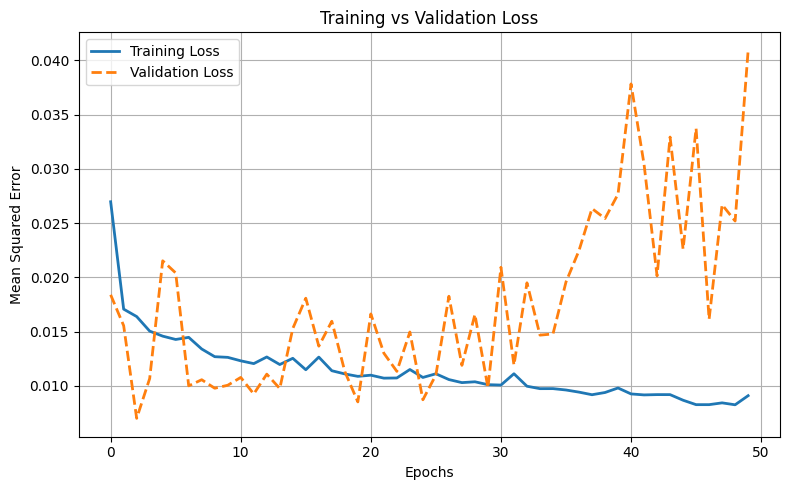

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


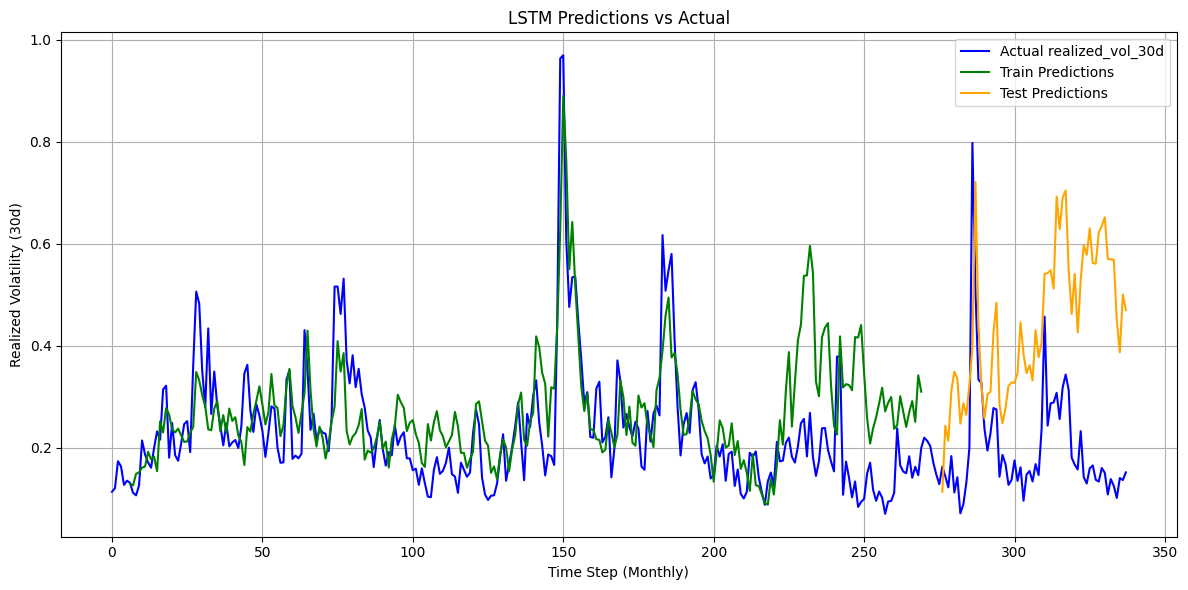

Train Score: 0.0115 MSE
Test Score: 0.0815 MSE


In [ ]:
# Predict on the train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert scaling for predictions and actuals
train_preds_inv = target_scaler.inverse_transform(train_preds)
y_train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))

test_preds_inv = target_scaler.inverse_transform(test_preds)
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare placeholders for plotting (based on total length of target series)
total_length = len(df_GERM)
plot_length = total_length

trainPredictPlot = np.full((plot_length,), np.nan)
trainPredictPlot[sequence_length:len(train_preds_inv) + sequence_length] = train_preds_inv.flatten()

testPredictPlot = np.full((plot_length,), np.nan)
testPredictPlot[len(train_preds_inv) + 2 * sequence_length:len(train_preds_inv) + 2 * sequence_length + len(test_preds_inv)] = test_preds_inv.flatten()

actualPlot = df_GERM['realized_vol_30d'].values  # Original target values


# Plot actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(actualPlot, label="Actual realized_vol_30d", color='blue')
plt.plot(trainPredictPlot, label="Train Predictions", color='green')
plt.plot(testPredictPlot, label="Test Predictions", color='orange')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("Realized Volatility (30d)")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print MSE scores
train_score = mean_squared_error(y_train_actual, train_preds_inv)
print(f'Train Score: {train_score:.4f} MSE')

test_score = mean_squared_error(y_test_actual, test_preds_inv)
print(f'Test Score: {test_score:.4f} MSE')

In [ ]:
# Define metrics
train_mae = mean_absolute_error(y_train_actual, train_preds_inv)
test_mae = mean_absolute_error(y_test_actual, test_preds_inv)

train_mse = mean_squared_error(y_train_actual, train_preds_inv)
test_mse = mean_squared_error(y_test_actual, test_preds_inv)

train_r2 = r2_score(y_train_actual, train_preds_inv)
test_r2 = r2_score(y_test_actual, test_preds_inv)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Percentage Error (handle divide-by-zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_preds_inv)
test_mape = mean_absolute_percentage_error(y_test_actual, test_preds_inv)

# Print metrics (like your example)
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAE: 0.0737
Test MAE: 0.3873
Training MSE: 0.0110
Test MSE: 0.2073
Training RMSE: 0.1050
Test RMSE: 0.4553
Training R² Score: 0.2557
Test R² Score: -14.7947
Training MAPE: 39.76%
Test MAPE: 243.84%


Feature Importance: Germany

In [ ]:
# Compute feature importances on test set
importances = permutation_feature_importance(
    model, X_test, y_test, mean_squared_error
)

# Display with feature names
feature_names = df_GERM.drop(columns=["Date", "realized_vol_30d"]).columns
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
log_return(M): 0.0039
GDP: -0.0010
CPI: -0.0242
FX_Realized_Volatility(30): 0.0101
FX_Realized_Volatility(60): 0.0030
FX_Realized_Volatility(90): -0.0151
MoM inflation rates: -0.0077
Yield curve: -0.0223


LSTM: Japan

In [ ]:
# Select the features . Here we have 8 feautures
features_JAP = df_JAP.drop(columns = ['Date', 'realized_vol_30d'])
target = df_JAP['realized_vol_30d']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features_scaled = feature_scaler.fit_transform(features_JAP)
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Set your sequence length
sequence_length = 6

# Function to create sequences with multiple features
def create_sequences_multivariate(X_data, y_data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - seq_length):
        X_seq.append(X_data[i:i+seq_length])
        y_seq.append(y_data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

train_size = int(len(features_scaled) * 0.80)
X_train_full = features_scaled[:train_size]
y_train_full = target_scaled[:train_size]

X_test_full = features_scaled[train_size:]
y_test_full = target_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences_multivariate(X_train_full, y_train_full, sequence_length)
X_test, y_test = create_sequences_multivariate(X_test_full, y_test_full, sequence_length)

# Reshape X to be [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], sequence_length, features_JAP.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, features_JAP.shape[1]))

# Get number of features from input shape
num_features = X_train.shape[2]  # This replaces the '1' in input_shape

# Build the LSTM model for multivariate input
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(1)  # Still 1 because you're predicting a single value (realized_vol_30d)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0289 - val_loss: 0.0064
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0064
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - val_loss: 0.0060
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - val_loss: 0.0139
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0113
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - val_loss: 0.0180
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - val_loss: 0.0166
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - val_loss: 0.0188
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - val_loss: 0.0139
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - val_loss: 0.0271
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0190

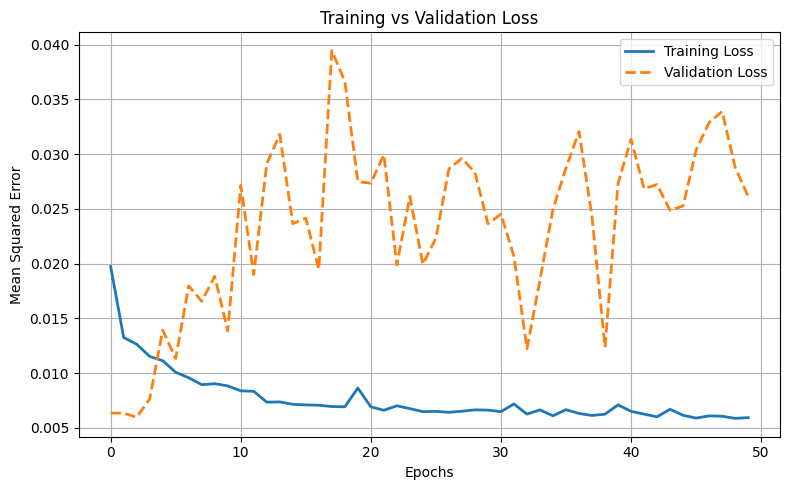

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


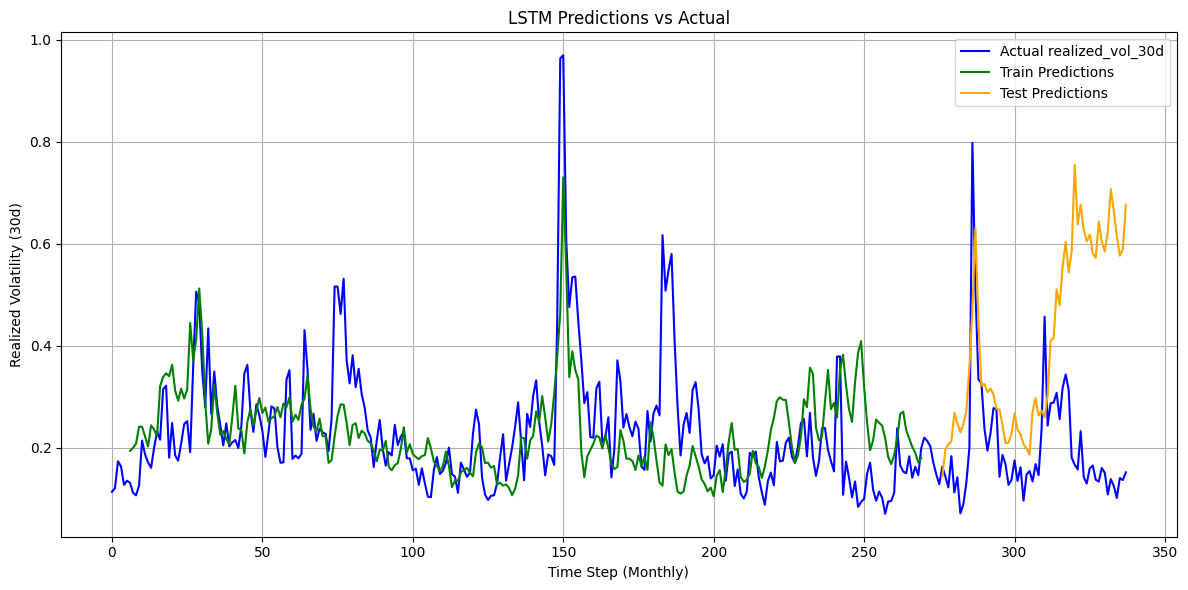

Train Score: 0.0070 MSE
Test Score: 0.0945 MSE


In [ ]:
# Predict on the train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert scaling for predictions and actuals
train_preds_inv = target_scaler.inverse_transform(train_preds)
y_train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))

test_preds_inv = target_scaler.inverse_transform(test_preds)
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare placeholders for plotting (based on total length of target series)
total_length = len(df_JAP)
plot_length = total_length

trainPredictPlot = np.full((plot_length,), np.nan)
trainPredictPlot[sequence_length:len(train_preds_inv) + sequence_length] = train_preds_inv.flatten()

testPredictPlot = np.full((plot_length,), np.nan)
testPredictPlot[len(train_preds_inv) + 2 * sequence_length:len(train_preds_inv) + 2 * sequence_length + len(test_preds_inv)] = test_preds_inv.flatten()

actualPlot = df_GERM['realized_vol_30d'].values  # Original target values

# Plot actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(actualPlot, label="Actual realized_vol_30d", color='blue')
plt.plot(trainPredictPlot, label="Train Predictions", color='green')
plt.plot(testPredictPlot, label="Test Predictions", color='orange')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("Realized Volatility (30d)")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print MSE scores
train_score = mean_squared_error(y_train_actual, train_preds_inv)
print(f'Train Score: {train_score:.4f} MSE')

test_score = mean_squared_error(y_test_actual, test_preds_inv)
print(f'Test Score: {test_score:.4f} MSE')

In [ ]:
# Define metrics
train_mae = mean_absolute_error(y_train_actual, train_preds_inv)
test_mae = mean_absolute_error(y_test_actual, test_preds_inv)

train_mse = mean_squared_error(y_train_actual, train_preds_inv)
test_mse = mean_squared_error(y_test_actual, test_preds_inv)

train_r2 = r2_score(y_train_actual, train_preds_inv)
test_r2 = r2_score(y_test_actual, test_preds_inv)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Percentage Error (handle divide-by-zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_preds_inv)
test_mape = mean_absolute_percentage_error(y_test_actual, test_preds_inv)

# Print metrics (like your example)
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAE: 0.0593
Test MAE: 0.2513
Training MSE: 0.0070
Test MSE: 0.0945
Training RMSE: 0.0837
Test RMSE: 0.3074
Training R² Score: 0.3534
Test R² Score: -19.8424
Training MAPE: 38.63%
Test MAPE: 177.02%


Feature Importance: Japan

In [ ]:
# Compute feature importances on test set
importances = permutation_feature_importance(
    model, X_test, y_test, mean_squared_error
)

# Display with feature names
feature_names = df_JAP.drop(columns=["Date", "realized_vol_30d"]).columns
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
log_return(M): 0.0055
GDP: 0.0106
CPI: -0.0343
FX_Realized_Volatility(30): -0.0079
FX_Realized_Volatility(60): -0.0085
FX_Realized_Volatility(90): -0.0081
MoM inflation rates: -0.0101
Yield curve: 0.0135


LSTM: UK

In [ ]:
# Select the features . Here we have 8 feautures
features_UK = df_UK.drop(columns = ['Date', 'realized_vol_30d'])
target = df_UK['realized_vol_30d']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features_scaled = feature_scaler.fit_transform(features_UK)
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Set your sequence length
sequence_length = 6

# Function to create sequences with multiple features
def create_sequences_multivariate(X_data, y_data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - seq_length):
        X_seq.append(X_data[i:i+seq_length])
        y_seq.append(y_data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

train_size = int(len(features_scaled) * 0.80)
X_train_full = features_scaled[:train_size]
y_train_full = target_scaled[:train_size]

X_test_full = features_scaled[train_size:]
y_test_full = target_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences_multivariate(X_train_full, y_train_full, sequence_length)
X_test, y_test = create_sequences_multivariate(X_test_full, y_test_full, sequence_length)

# Reshape X to be [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], sequence_length, features_UK.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, features_UK.shape[1]))

# Get number of features from input shape
num_features = X_train.shape[2]  # This replaces the '1' in input_shape

# Build the LSTM model for multivariate input
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(1)  # Still 1 because you're predicting a single value (realized_vol_30d)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0666 - val_loss: 0.0243
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0138
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - val_loss: 0.0100
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 - val_loss: 0.0104
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0098
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0106
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0115
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - val_loss: 0.0119
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - val_loss: 0.0111
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - val_loss: 0.0091

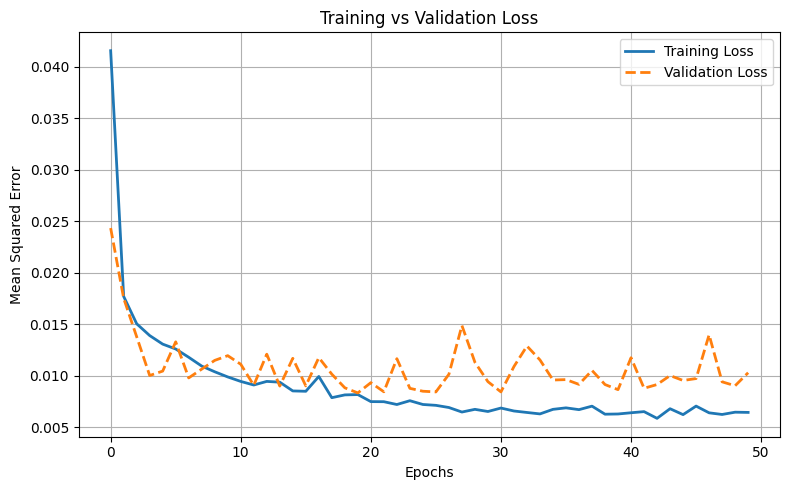

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


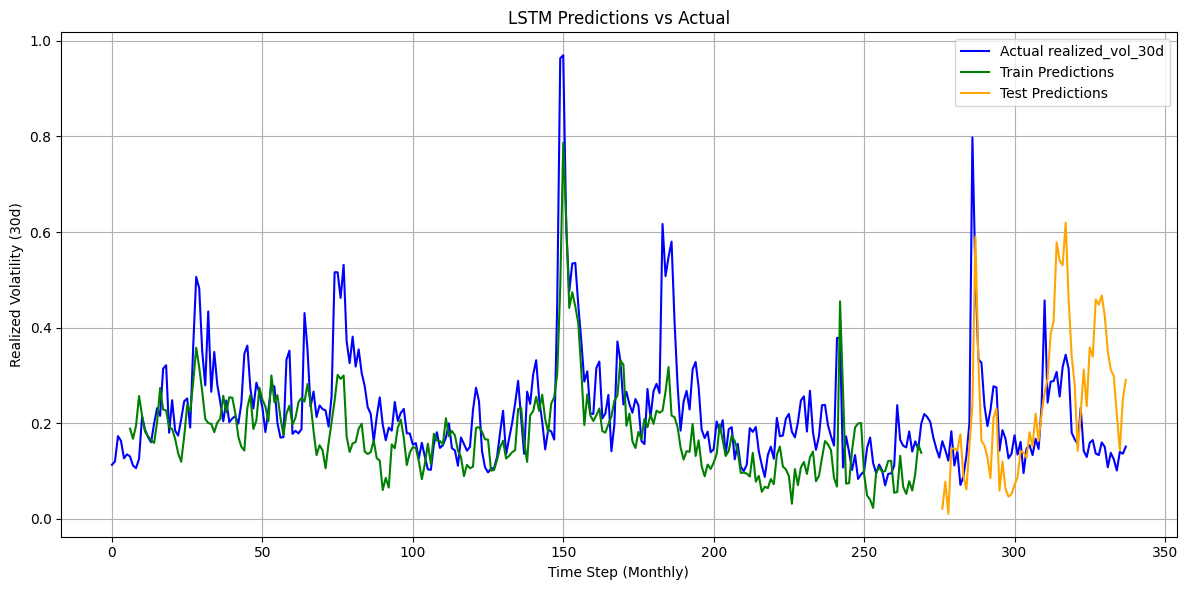

Train Score: 0.0059 MSE
Test Score: 0.0301 MSE


In [ ]:
# Predict on the train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert scaling for predictions and actuals
train_preds_inv = target_scaler.inverse_transform(train_preds)
y_train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))

test_preds_inv = target_scaler.inverse_transform(test_preds)
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare placeholders for plotting (based on total length of target series)
total_length = len(df_UK)
plot_length = total_length

trainPredictPlot = np.full((plot_length,), np.nan)
trainPredictPlot[sequence_length:len(train_preds_inv) + sequence_length] = train_preds_inv.flatten()

testPredictPlot = np.full((plot_length,), np.nan)
testPredictPlot[len(train_preds_inv) + 2 * sequence_length:len(train_preds_inv) + 2 * sequence_length + len(test_preds_inv)] = test_preds_inv.flatten()

actualPlot = df_GERM['realized_vol_30d'].values  # Original target values

# Plot actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(actualPlot, label="Actual realized_vol_30d", color='blue')
plt.plot(trainPredictPlot, label="Train Predictions", color='green')
plt.plot(testPredictPlot, label="Test Predictions", color='orange')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("Realized Volatility (30d)")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print MSE scores
train_score = mean_squared_error(y_train_actual, train_preds_inv)
print(f'Train Score: {train_score:.4f} MSE')

test_score = mean_squared_error(y_test_actual, test_preds_inv)
print(f'Test Score: {test_score:.4f} MSE')

In [ ]:
# Define metrics
train_mae = mean_absolute_error(y_train_actual, train_preds_inv)
test_mae = mean_absolute_error(y_test_actual, test_preds_inv)

train_mse = mean_squared_error(y_train_actual, train_preds_inv)
test_mse = mean_squared_error(y_test_actual, test_preds_inv)

train_r2 = r2_score(y_train_actual, train_preds_inv)
test_r2 = r2_score(y_test_actual, test_preds_inv)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Percentage Error (handle divide-by-zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_preds_inv)
test_mape = mean_absolute_percentage_error(y_test_actual, test_preds_inv)

# Print metrics (like your example)
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAE: 0.0529
Test MAE: 0.1295
Training MSE: 0.0059
Test MSE: 0.0301
Training RMSE: 0.0769
Test RMSE: 0.1734
Training R² Score: 0.5585
Test R² Score: -1.4288
Training MAPE: 27.93%
Test MAPE: 82.42%


Feature Importance: UK

In [ ]:
# Compute feature importances on test set
importances = permutation_feature_importance(
    model, X_test, y_test, mean_squared_error
)

# Display with feature names
feature_names = df_UK.drop(columns=["Date", "realized_vol_30d"]).columns
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
log_return(M): 0.0033
GDP: 0.0130
CPI: -0.0098
FX_Realized_Volatility(30): -0.0009
FX_Realized_Volatility(60): 0.0001
FX_Realized_Volatility(90): 0.0008
MoM inflation rates: -0.0100
Yield curve: -0.0068


LSTM: US

In [ ]:
# Select the features . Here we have 8 feautures
features_US = df_US.drop(columns = ['Date', 'realized_vol_30d'])
target = df_US['realized_vol_30d']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features_scaled = feature_scaler.fit_transform(features_US)
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Set your sequence length
sequence_length = 6

# Function to create sequences with multiple features
def create_sequences_multivariate(X_data, y_data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - seq_length):
        X_seq.append(X_data[i:i+seq_length])
        y_seq.append(y_data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

train_size = int(len(features_scaled) * 0.80)
X_train_full = features_scaled[:train_size]
y_train_full = target_scaled[:train_size]

X_test_full = features_scaled[train_size:]
y_test_full = target_scaled[train_size:]

# Create sequences
X_train, y_train = create_sequences_multivariate(X_train_full, y_train_full, sequence_length)
X_test, y_test = create_sequences_multivariate(X_test_full, y_test_full, sequence_length)

# Reshape X to be [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], sequence_length, features_US.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, features_US.shape[1]))

# Get number of features from input shape
num_features = X_train.shape[2]  # This replaces the '1' in input_shape

# Build the LSTM model for multivariate input
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(1)  # Still 1 because you're predicting a single value (realized_vol_30d)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0157 - val_loss: 0.0068
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0115 - val_loss: 0.0052
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0125 - val_loss: 0.0052
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0117 - val_loss: 0.0055
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0099 - val_loss: 0.0045
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - val_loss: 0.0044
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.0045
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - val_loss:

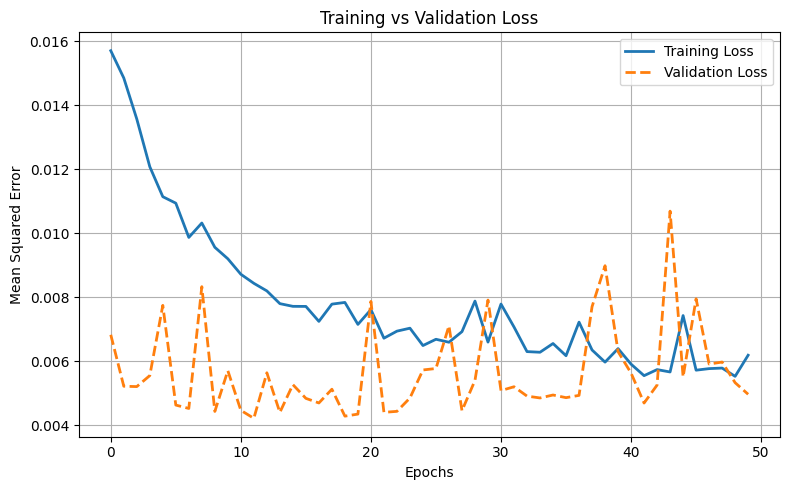

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


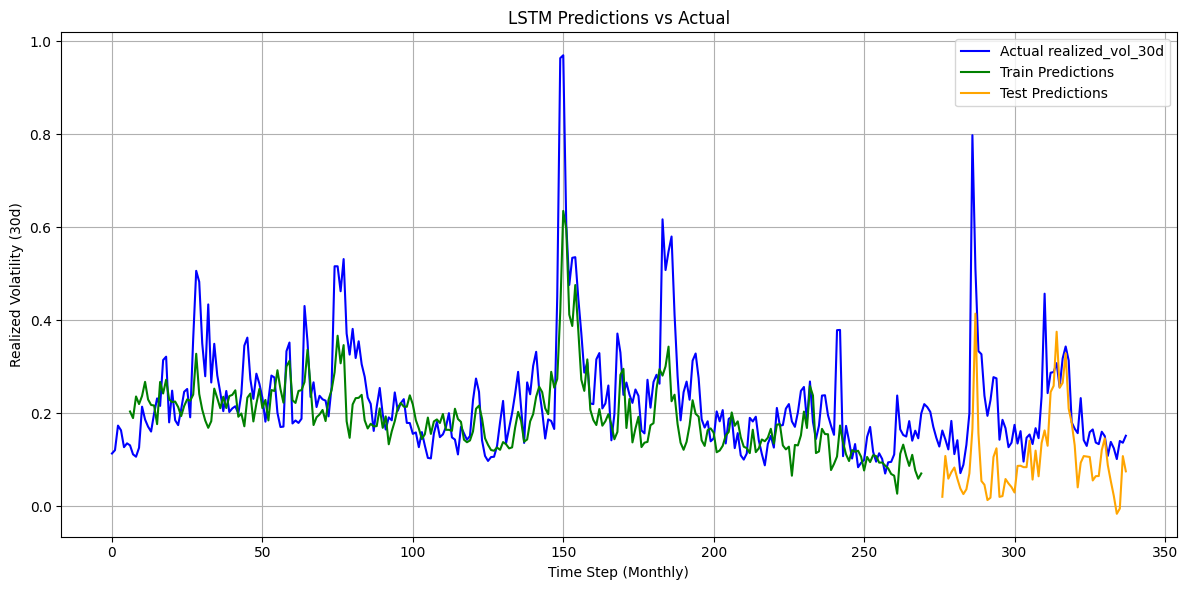

Train Score: 0.0040 MSE
Test Score: 0.0137 MSE


In [ ]:
# Predict on the train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert scaling for predictions and actuals
train_preds_inv = target_scaler.inverse_transform(train_preds)
y_train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))

test_preds_inv = target_scaler.inverse_transform(test_preds)
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Prepare placeholders for plotting (based on total length of target series)
total_length = len(df_US)
plot_length = total_length

trainPredictPlot = np.full((plot_length,), np.nan)
trainPredictPlot[sequence_length:len(train_preds_inv) + sequence_length] = train_preds_inv.flatten()

testPredictPlot = np.full((plot_length,), np.nan)
testPredictPlot[len(train_preds_inv) + 2 * sequence_length:len(train_preds_inv) + 2 * sequence_length + len(test_preds_inv)] = test_preds_inv.flatten()

actualPlot = df_GERM['realized_vol_30d'].values  # Original target values

# Plot actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(actualPlot, label="Actual realized_vol_30d", color='blue')
plt.plot(trainPredictPlot, label="Train Predictions", color='green')
plt.plot(testPredictPlot, label="Test Predictions", color='orange')
plt.xlabel("Time Step (Monthly)")
plt.ylabel("Realized Volatility (30d)")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print MSE scores
train_score = mean_squared_error(y_train_actual, train_preds_inv)
print(f'Train Score: {train_score:.4f} MSE')

test_score = mean_squared_error(y_test_actual, test_preds_inv)
print(f'Test Score: {test_score:.4f} MSE')

In [ ]:
# Define metrics
train_mae = mean_absolute_error(y_train_actual, train_preds_inv)
test_mae = mean_absolute_error(y_test_actual, test_preds_inv)

train_mse = mean_squared_error(y_train_actual, train_preds_inv)
test_mse = mean_squared_error(y_test_actual, test_preds_inv)

train_r2 = r2_score(y_train_actual, train_preds_inv)
test_r2 = r2_score(y_test_actual, test_preds_inv)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Percentage Error (handle divide-by-zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_preds_inv)
test_mape = mean_absolute_percentage_error(y_test_actual, test_preds_inv)

# Print metrics (like your example)
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Training MAE: 0.0498
Test MAE: 0.0777
Training MSE: 0.0040
Test MSE: 0.0137
Training RMSE: 0.0634
Test RMSE: 0.1170
Training R² Score: 0.5496
Test R² Score: -0.1005
Training MAPE: 37.88%
Test MAPE: 43.85%


Feature Importance: US

In [ ]:
# Compute feature importances on test set
importances = permutation_feature_importance(
    model, X_test, y_test, mean_squared_error
)

# Display with feature names
feature_names = df_US.drop(columns=["Date", "realized_vol_30d"]).columns
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
log_return(M): 0.0114
GDP: 0.0080
CPI: 0.0000
FX_Realized_Volatility(30): 0.0023
FX_Realized_Volatility(60): 0.0004
FX_Realized_Volatility(90): 0.0004
MoM inflation rates: -0.0020
Yield curve: 0.0007
